In [ ]:
# Isi dengan data diri Anda
NAMA = "kelompok Ber3 saja"
TOPIK = "DIM"

NPM = ["1906398761", "206596604", "2006596996"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['https://scikit-learn.org/', 'https://stackoverflow.com/']

In [ ]:
# !pip list -v

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# drive.mount("/content/drive/", force_remount=True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
loc = '/content/drive/MyDrive/Colab Notebooks/KASDD_TK/'

# Imports and prepwork

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
# Import data
df = pd.read_csv(loc + '07dish_market.csv')

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install seaborn
# !pip install pydotplus
# !pip install graphviz

# Data Understanding


In [ ]:
df_und = df.copy(deep=True)

In [ ]:
df_und.dtypes

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type                     object
store_city  

In [ ]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])


In [ ]:
cek_null(df_und)
df_und.shape

                          Total   Percent
recyclable_package         1200  0.018866
food_family                1200  0.018866
store_sales(in millions)   1200  0.018866
store_cost(in millions)    1200  0.018866
education                  1200  0.018866


(63608, 38)

In [ ]:
total_rows, total_attributes = df_und.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df_und.head()

Jumlah data: 63608
Jumlah atribut: 38


,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df_und.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63608 entries, 0 to 63607
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               63608 non-null  object 
 1   food_department             63608 non-null  object 
 2   food_family                 62408 non-null  object 
 3   store_sales(in millions)    62408 non-null  float64
 4   store_cost(in millions)     62408 non-null  float64
 5   unit_sales(in millions)     63608 non-null  float64
 6   promotion_name              63608 non-null  object 
 7   sales_country               63608 non-null  object 
 8   marital_status              63608 non-null  object 
 9   gender                      63608 non-null  object 
 10  total_children              63608 non-null  float64
 11  education                   62408 non-null  object 
 12  member_card                 63608 non-null  object 
 13  occupation                  636

In [ ]:
df_und_clean = df_und[df_und['store_cost(in millions)'].notna()]
df_und_unknown = df_und[df_und['store_cost(in millions)'].isna()]

In [ ]:
df_und_clean.shape

(62408, 38)

In [ ]:
cek_null(df_und_clean)
df_und_clean.shape
cek_null(df_und_unknown)

Empty DataFrame
Columns: [Total, Percent]
Index: []
                          Total  Percent
recyclable_package         1200      1.0
food_family                1200      1.0
store_sales(in millions)   1200      1.0
store_cost(in millions)    1200      1.0
education                  1200      1.0


# Analysis


Menggunakan domain knowledge Data dapat dikategorikan sebagai 4 objek terpisah dengan relasi. Yakni Produk, Toko, Promosi, dan Pembeli.

## Product



*   Food Category
*   Food Department
*   Food Family
*   Brand Name
*   SRP (Suggested Retail Price)
*   Gross Weight
*   net Weight
*   recycleable package
*   low fat
*   units per case
*   Unit sales

In [ ]:
df_stock = df[['food_category', 'food_department', 'food_family', 'brand_name',
               'SRP', 'gross_weight', 'net_weight', 'recyclable_package',
               'low_fat', 'units_per_case', 'unit_sales(in millions)']]

In [ ]:
df_stock.head(5)

,food_category,food_department,food_family,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,unit_sales(in millions)
0,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,4.0
1,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,3.0
2,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,2.0
3,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,2.0
4,Breakfast Foods,Frozen Foods,Food,Golden,1.36,7.12,5.11,0.0,1.0,29.0,3.0


In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63608 entries, 0 to 63607
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   food_category            63608 non-null  object 
 1   food_department          63608 non-null  object 
 2   food_family              62408 non-null  object 
 3   brand_name               63608 non-null  object 
 4   SRP                      63608 non-null  float64
 5   gross_weight             63608 non-null  float64
 6   net_weight               63608 non-null  float64
 7   recyclable_package       62408 non-null  float64
 8   low_fat                  63608 non-null  float64
 9   units_per_case           63608 non-null  float64
 10  unit_sales(in millions)  63608 non-null  float64
dtypes: float64(7), object(4)
memory usage: 5.3+ MB


In [ ]:
df_stock = df_stock.drop_duplicates()
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6753 entries, 0 to 63545
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   food_category            6753 non-null   object 
 1   food_department          6753 non-null   object 
 2   food_family              6534 non-null   object 
 3   brand_name               6753 non-null   object 
 4   SRP                      6753 non-null   float64
 5   gross_weight             6753 non-null   float64
 6   net_weight               6753 non-null   float64
 7   recyclable_package       6534 non-null   float64
 8   low_fat                  6753 non-null   float64
 9   units_per_case           6753 non-null   float64
 10  unit_sales(in millions)  6753 non-null   float64
dtypes: float64(7), object(4)
memory usage: 633.1+ KB


In [ ]:
corr = df_stock.corr()
corr.style.background_gradient(cmap='coolwarm_r')

,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,unit_sales(in millions)
SRP,1.000000,0.042283,0.039518,0.040839,0.000342,-0.004888,-0.005285
gross_weight,0.042283,1.000000,0.988922,0.052875,-0.044789,-0.007762,-0.001478
net_weight,0.039518,0.988922,1.000000,0.054854,-0.047122,-0.011020,-0.003637
recyclable_package,0.040839,0.052875,0.054854,1.000000,-0.031292,-0.003927,-0.002794
low_fat,0.000342,-0.044789,-0.047122,-0.031292,1.000000,0.025075,-0.002792
units_per_case,-0.004888,-0.007762,-0.011020,-0.003927,0.025075,1.000000,-0.001713
unit_sales(in millions),-0.005285,-0.001478,-0.003637,-0.002794,-0.002792,-0.001713,1.000000


In [ ]:
# # menampilkan plot data
# sns.pairplot(df_stock,hue ='food_category')

In [ ]:
df_stock.insert(0, 'product_id', range(1, 1 + len(df_stock)))

In [ ]:
df_stock.head(5)

,product_id,food_category,food_department,food_family,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,unit_sales(in millions)
0,1,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,4.0
1,2,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,3.0
2,3,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,2.0
4,4,Breakfast Foods,Frozen Foods,Food,Golden,1.36,7.12,5.11,0.0,1.0,29.0,3.0
6,5,Breakfast Foods,Frozen Foods,Food,Golden,1.36,7.12,5.11,0.0,1.0,29.0,4.0


## Toko:

*   Store Type
*   Store City
*   Store State
*   Store sqft
*   Grocery sqft
*   Frozen sqft
*   Meat sqft
*   Coffee bar
*   Video store
*   prepared food
*   Florist
*   Store sales
*   Store cost

In [ ]:
df_store = df[['store_type', 'store_city', 'store_state', 'store_sqft',
               'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
               'video_store', 'prepared_food', 'florist',
               'store_sales(in millions)', 'store_cost(in millions)']]

In [ ]:
df_store.head(5)

,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,store_sales(in millions),store_cost(in millions)
0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,7.36,2.7232
1,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,5.52,2.5944
2,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,3.68,1.3616
3,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,3.68,1.1776
4,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,4.08,1.4280


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63608 entries, 0 to 63607
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_type                63608 non-null  object 
 1   store_city                63608 non-null  object 
 2   store_state               63608 non-null  object 
 3   store_sqft                63608 non-null  float64
 4   grocery_sqft              63608 non-null  float64
 5   frozen_sqft               63608 non-null  float64
 6   meat_sqft                 63608 non-null  float64
 7   coffee_bar                63608 non-null  float64
 8   video_store               63608 non-null  float64
 9   prepared_food             63608 non-null  float64
 10  florist                   63608 non-null  float64
 11  store_sales(in millions)  62408 non-null  float64
 12  store_cost(in millions)   62408 non-null  float64
dtypes: float64(10), object(3)
memory usage: 6.3+ MB


In [ ]:
df_store = df_store.drop_duplicates()
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50592 entries, 0 to 63366
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_type                50592 non-null  object 
 1   store_city                50592 non-null  object 
 2   store_state               50592 non-null  object 
 3   store_sqft                50592 non-null  float64
 4   grocery_sqft              50592 non-null  float64
 5   frozen_sqft               50592 non-null  float64
 6   meat_sqft                 50592 non-null  float64
 7   coffee_bar                50592 non-null  float64
 8   video_store               50592 non-null  float64
 9   prepared_food             50592 non-null  float64
 10  florist                   50592 non-null  float64
 11  store_sales(in millions)  50572 non-null  float64
 12  store_cost(in millions)   50572 non-null  float64
dtypes: float64(10), object(3)
memory usage: 5.4+ MB


In [ ]:
corr = df_store.corr()
corr.style.background_gradient(cmap='coolwarm_r')

,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,store_sales(in millions),store_cost(in millions)
store_sqft,1.000000,0.911844,0.778111,0.778145,-0.178148,-0.090011,0.382123,-0.044663,0.017973,0.019569
grocery_sqft,0.911844,1.000000,0.451646,0.451694,-0.249923,-0.114987,0.286262,-0.144831,0.011385,0.013288
frozen_sqft,0.778111,0.451646,1.000000,1.000000,-0.004773,-0.019657,0.392484,0.124551,0.021642,0.022198
meat_sqft,0.778145,0.451694,1.000000,1.000000,-0.004805,-0.019721,0.392450,0.124479,0.021638,0.022195
coffee_bar,-0.178148,-0.249923,-0.004773,-0.004805,1.000000,0.588595,0.517502,0.629659,-0.031215,-0.029183
video_store,-0.090011,-0.114987,-0.019657,-0.019721,0.588595,1.000000,0.619527,0.655928,0.022491,0.022135
prepared_food,0.382123,0.286262,0.392484,0.392450,0.517502,0.619527,1.000000,0.633680,0.037120,0.038157
florist,-0.044663,-0.144831,0.124551,0.124479,0.629659,0.655928,0.633680,1.000000,0.035901,0.035667
store_sales(in millions),0.017973,0.011385,0.021642,0.021638,-0.031215,0.022491,0.037120,0.035901,1.000000,0.955520
store_cost(in millions),0.019569,0.013288,0.022198,0.022195,-0.029183,0.022135,0.038157,0.035667,0.955520,1.000000


In [ ]:
# # menampilkan plot data
# sns.pairplot(df_store,hue ='store_type')

In [ ]:
# TODO: statistic target variable --> menentukan balance atau tidak
df_store.describe()

,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,store_sales(in millions),store_cost(in millions)
count,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50572.000000,50572.000000
mean,28041.846972,19190.974719,5310.566097,3540.323628,0.606875,0.348454,0.582187,0.554179,6.604433,2.643600
std,5741.366336,4042.002976,1585.173017,1056.651953,0.488449,0.476485,0.493204,0.497061,3.554489,1.488797
min,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.510000,0.163200
25%,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,3.780000,1.483500
50%,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,5.980000,2.401400
75%,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,8.820000,3.540600
max,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,22.920000,9.726500


In [ ]:
df_store.insert(0, 'store_id', range(1, 1 + len(df_store)))

In [ ]:
df_store.head(5)

,store_id,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,store_sales(in millions),store_cost(in millions)
0,1,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,7.36,2.7232
1,2,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,5.52,2.5944
2,3,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,3.68,1.3616
3,4,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,3.68,1.1776
4,5,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,4.08,1.4280


## Promosi:



*   promotion name
*   sales country
*   media type
*   cost

In [ ]:
df_promo = df[['promotion_name', 'sales_country', 'media_type', 'cost']]

In [ ]:
df_promo.head(5)

,promotion_name,sales_country,media_type,cost
0,Bag Stuffers,USA,"Daily Paper, Radio",126.62
1,Cash Register Lottery,USA,"Daily Paper, Radio",59.86
2,High Roller Savings,USA,"Daily Paper, Radio",84.16
3,Cash Register Lottery,USA,In-Store Coupon,95.78
4,Double Down Sale,USA,Radio,50.79


In [ ]:
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63608 entries, 0 to 63607
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   promotion_name  63608 non-null  object 
 1   sales_country   63608 non-null  object 
 2   media_type      63608 non-null  object 
 3   cost            63608 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
df_promo = df_promo.drop_duplicates()
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 9411
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   promotion_name  331 non-null    object 
 1   sales_country   331 non-null    object 
 2   media_type      331 non-null    object 
 3   cost            331 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.9+ KB


In [ ]:
corr = df_promo.corr()
corr.style.background_gradient(cmap='coolwarm_r')

,cost
cost,1.000000


In [ ]:
# # menampilkan plot data
# sns.pairplot(df_promo,hue ='promotion_name')

In [ ]:
df_promo.insert(0, 'promo_id', range(1, 1 + len(df_promo)))

In [ ]:
df_promo.head(5)

,promo_id,promotion_name,sales_country,media_type,cost
0,1,Bag Stuffers,USA,"Daily Paper, Radio",126.62
1,2,Cash Register Lottery,USA,"Daily Paper, Radio",59.86
2,3,High Roller Savings,USA,"Daily Paper, Radio",84.16
3,4,Cash Register Lottery,USA,In-Store Coupon,95.78
4,5,Double Down Sale,USA,Radio,50.79


## Pembeli:


*   marital status
*   gender
*   total children
*   education
*   member card
*   occupation
*   houseowner
*   avg cars at home
*   avg annual income
*   avg cars at home (* duplicate)

In [ ]:
df_buyer = df[['marital_status', 'gender', 'total_children', 'education',
               'member_card', 'occupation', 'houseowner',
               'avg_cars_at home(approx)', 'avg. yearly_income',
               'sales_country']]

In [ ]:
df_buyer.head(5)

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,sales_country
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,USA
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,USA
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,USA
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,USA
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,USA


In [ ]:
df_buyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63608 entries, 0 to 63607
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marital_status            63608 non-null  object 
 1   gender                    63608 non-null  object 
 2   total_children            63608 non-null  float64
 3   education                 62408 non-null  object 
 4   member_card               63608 non-null  object 
 5   occupation                63608 non-null  object 
 6   houseowner                63608 non-null  object 
 7   avg_cars_at home(approx)  63608 non-null  float64
 8   avg. yearly_income        63608 non-null  object 
 9   sales_country             63608 non-null  object 
dtypes: float64(2), object(8)
memory usage: 4.9+ MB


In [ ]:
df_buyer = df_buyer.drop_duplicates()
df_buyer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4661 entries, 0 to 63601
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marital_status            4661 non-null   object 
 1   gender                    4661 non-null   object 
 2   total_children            4661 non-null   float64
 3   education                 3845 non-null   object 
 4   member_card               4661 non-null   object 
 5   occupation                4661 non-null   object 
 6   houseowner                4661 non-null   object 
 7   avg_cars_at home(approx)  4661 non-null   float64
 8   avg. yearly_income        4661 non-null   object 
 9   sales_country             4661 non-null   object 
dtypes: float64(2), object(8)
memory usage: 400.6+ KB


In [ ]:
corr = df_buyer.corr()
corr.style.background_gradient(cmap='coolwarm_r')

,total_children,avg_cars_at home(approx)
total_children,1.000000,0.075243
avg_cars_at home(approx),0.075243,1.000000


In [ ]:
# # menampilkan plot data
# sns.pairplot(df_buyer,hue ='occupation')

In [ ]:
df_buyer.insert(0, 'buyer_id', range(1, 1 + len(df_buyer)))

In [ ]:
df_buyer.head(5)

,buyer_id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,sales_country
0,1,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,USA
1,2,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,USA
2,3,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,USA
3,4,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,USA
4,5,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,USA


## Possible relations:


*   Product - Promotion: Affect of Promotion on sales
*   Product - Customer: Product and target demographic
*   Product - Store: Store layout and Product sales
*   Store - Promotion: Promotion Area and Sales performance
*   Store - Customer: Store layout and Customer retention
*   Promotion - Customer: Promotion and affected demographic

In [ ]:
# Create relationship table (store id, product id, promo id, customer id)
df_rel = df.copy(deep=True)

In [ ]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63608 entries, 0 to 63607
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               63608 non-null  object 
 1   food_department             63608 non-null  object 
 2   food_family                 62408 non-null  object 
 3   store_sales(in millions)    62408 non-null  float64
 4   store_cost(in millions)     62408 non-null  float64
 5   unit_sales(in millions)     63608 non-null  float64
 6   promotion_name              63608 non-null  object 
 7   sales_country               63608 non-null  object 
 8   marital_status              63608 non-null  object 
 9   gender                      63608 non-null  object 
 10  total_children              63608 non-null  float64
 11  education                   62408 non-null  object 
 12  member_card                 63608 non-null  object 
 13  occupation                  636

In [ ]:
df_rel = pd.merge(df_rel, df_store)

In [ ]:
df_rel = pd.merge(df_rel, df_stock)

In [ ]:
df_rel = pd.merge(df_rel, df_promo)

In [ ]:
df_rel = pd.merge(df_rel, df_buyer)

In [ ]:
df_rel.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1,1,1,1
1,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
2,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
3,Kitchen Products,Household,Non-Consumable,11.85,4.6215,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,42997,5422,1,1
4,Snack Foods,Snack Foods,Food,1.98,0.6732,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,46490,5929,1,1


In [ ]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63608 entries, 0 to 63607
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               63608 non-null  object 
 1   food_department             63608 non-null  object 
 2   food_family                 62408 non-null  object 
 3   store_sales(in millions)    62408 non-null  float64
 4   store_cost(in millions)     62408 non-null  float64
 5   unit_sales(in millions)     63608 non-null  float64
 6   promotion_name              63608 non-null  object 
 7   sales_country               63608 non-null  object 
 8   marital_status              63608 non-null  object 
 9   gender                      63608 non-null  object 
 10  total_children              63608 non-null  float64
 11  education                   62408 non-null  object 
 12  member_card                 63608 non-null  object 
 13  occupation                  636

In [ ]:
corr = df_rel.drop(['store_id', 'product_id', 'promo_id', 'buyer_id'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm_r')

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,cost
store_sales(in millions),1.000000,0.954638,0.504408,0.082368,0.004655,0.004655,0.833160,0.039102,0.035342,0.033127,-0.004485,-0.012063,0.014975,0.009574,0.017971,0.017968,-0.028778,0.020298,0.031706,0.030916,-0.005296
store_cost(in millions),0.954638,1.000000,0.480592,0.077827,0.003077,0.003077,0.795757,0.036969,0.033345,0.028651,-0.004373,-0.011507,0.017189,0.011944,0.019179,0.019176,-0.026382,0.020553,0.033687,0.031381,-0.004857
unit_sales(in millions),0.504408,0.480592,1.000000,0.161843,0.023878,0.023878,-0.001670,0.001720,0.001747,0.001243,-0.000983,-0.000114,0.031640,0.024483,0.031496,0.031490,-0.056561,0.036631,0.060436,0.057013,-0.014468
total_children,0.082368,0.077827,0.161843,1.000000,0.096492,0.096492,-0.001155,-0.002313,-0.001992,0.002070,-0.001728,0.002153,0.001151,0.019136,-0.026545,-0.026541,0.003477,-0.000228,-0.012415,-0.002647,-0.002565
avg_cars_at home(approx),0.004655,0.003077,0.023878,0.096492,1.000000,1.000000,-0.008295,0.004262,0.003813,0.003403,-0.005273,-0.007002,-0.015317,-0.018025,-0.005884,-0.005880,-0.003091,0.013514,-0.008582,-0.004658,0.011713
avg_cars_at home(approx).1,0.004655,0.003077,0.023878,0.096492,1.000000,1.000000,-0.008295,0.004262,0.003813,0.003403,-0.005273,-0.007002,-0.015317,-0.018025,-0.005884,-0.005880,-0.003091,0.013514,-0.008582,-0.004658,0.011713
SRP,0.833160,0.795757,-0.001670,-0.001155,-0.008295,-0.008295,1.000000,0.046175,0.042475,0.040837,-0.003631,-0.014759,0.001618,-0.000334,0.004017,0.004016,0.000501,0.003821,0.003317,0.003971,0.001723
gross_weight,0.039102,0.036969,0.001720,-0.002313,0.004262,0.004262,0.046175,1.000000,0.988900,0.063690,-0.033938,-0.009423,-0.005357,-0.005215,-0.003709,-0.003710,0.001079,0.001462,0.000884,0.001410,0.001011
net_weight,0.035342,0.033345,0.001747,-0.001992,0.003813,0.003813,0.042475,0.988900,1.000000,0.064847,-0.036762,-0.012651,-0.004517,-0.004247,-0.003355,-0.003355,0.001023,0.001603,0.001560,0.000988,0.001056
recyclable_package,0.033127,0.028651,0.001243,0.002070,0.003403,0.003403,0.040837,0.063690,0.064847,1.000000,-0.029190,-0.002780,0.001346,0.001218,0.001072,0.001071,-0.000257,0.001072,0.000734,-0.001466,-0.002403


In [ ]:
corr = df_rel.corr()
corr.style.background_gradient(cmap='coolwarm_r')

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,cost,store_id,product_id,promo_id,buyer_id
store_sales(in millions),1.000000,0.954638,0.504408,0.082368,0.004655,0.004655,0.833160,0.039102,0.035342,0.033127,-0.004485,-0.012063,0.014975,0.009574,0.017971,0.017968,-0.028778,0.020298,0.031706,0.030916,-0.005296,0.008774,-0.009126,-0.039477,-0.022455
store_cost(in millions),0.954638,1.000000,0.480592,0.077827,0.003077,0.003077,0.795757,0.036969,0.033345,0.028651,-0.004373,-0.011507,0.017189,0.011944,0.019179,0.019176,-0.026382,0.020553,0.033687,0.031381,-0.004857,0.006900,-0.008468,-0.036131,-0.021094
unit_sales(in millions),0.504408,0.480592,1.000000,0.161843,0.023878,0.023878,-0.001670,0.001720,0.001747,0.001243,-0.000983,-0.000114,0.031640,0.024483,0.031496,0.031490,-0.056561,0.036631,0.060436,0.057013,-0.014468,-0.001930,-0.003848,-0.086147,-0.041813
total_children,0.082368,0.077827,0.161843,1.000000,0.096492,0.096492,-0.001155,-0.002313,-0.001992,0.002070,-0.001728,0.002153,0.001151,0.019136,-0.026545,-0.026541,0.003477,-0.000228,-0.012415,-0.002647,-0.002565,0.003851,-0.001363,0.011738,-0.010117
avg_cars_at home(approx),0.004655,0.003077,0.023878,0.096492,1.000000,1.000000,-0.008295,0.004262,0.003813,0.003403,-0.005273,-0.007002,-0.015317,-0.018025,-0.005884,-0.005880,-0.003091,0.013514,-0.008582,-0.004658,0.011713,0.001395,0.002612,-0.006411,0.068275
avg_cars_at home(approx).1,0.004655,0.003077,0.023878,0.096492,1.000000,1.000000,-0.008295,0.004262,0.003813,0.003403,-0.005273,-0.007002,-0.015317,-0.018025,-0.005884,-0.005880,-0.003091,0.013514,-0.008582,-0.004658,0.011713,0.001395,0.002612,-0.006411,0.068275
SRP,0.833160,0.795757,-0.001670,-0.001155,-0.008295,-0.008295,1.000000,0.046175,0.042475,0.040837,-0.003631,-0.014759,0.001618,-0.000334,0.004017,0.004016,0.000501,0.003821,0.003317,0.003971,0.001723,0.014970,0.000096,0.002231,0.013662
gross_weight,0.039102,0.036969,0.001720,-0.002313,0.004262,0.004262,0.046175,1.000000,0.988900,0.063690,-0.033938,-0.009423,-0.005357,-0.005215,-0.003709,-0.003710,0.001079,0.001462,0.000884,0.001410,0.001011,-0.025881,-0.030588,-0.006286,0.008780
net_weight,0.035342,0.033345,0.001747,-0.001992,0.003813,0.003813,0.042475,0.988900,1.000000,0.064847,-0.036762,-0.012651,-0.004517,-0.004247,-0.003355,-0.003355,0.001023,0.001603,0.001560,0.000988,0.001056,-0.024657,-0.028314,-0.005431,0.006874
recyclable_package,0.033127,0.028651,0.001243,0.002070,0.003403,0.003403,0.040837,0.063690,0.064847,1.000000,-0.029190,-0.002780,0.001346,0.001218,0.001072,0.001071,-0.000257,0.001072,0.000734,-0.001466,-0.002403,-0.032225,-0.039254,0.001665,0.000318


## General Analysis

In [ ]:
df_rel.dtypes

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type                     object
store_city  

In [ ]:
total_rows, total_attributes = df_rel.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df_rel.head()

Jumlah data: 63608
Jumlah atribut: 42


,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1,1,1,1
1,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
2,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
3,Kitchen Products,Household,Non-Consumable,11.85,4.6215,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,42997,5422,1,1
4,Snack Foods,Snack Foods,Food,1.98,0.6732,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,46490,5929,1,1


In [ ]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63608 entries, 0 to 63607
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               63608 non-null  object 
 1   food_department             63608 non-null  object 
 2   food_family                 62408 non-null  object 
 3   store_sales(in millions)    62408 non-null  float64
 4   store_cost(in millions)     62408 non-null  float64
 5   unit_sales(in millions)     63608 non-null  float64
 6   promotion_name              63608 non-null  object 
 7   sales_country               63608 non-null  object 
 8   marital_status              63608 non-null  object 
 9   gender                      63608 non-null  object 
 10  total_children              63608 non-null  float64
 11  education                   62408 non-null  object 
 12  member_card                 63608 non-null  object 
 13  occupation                  636

In [ ]:
df_rel.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,...,meat_sqft,coffee_bar,video_store,prepared_food,florist,cost,store_id,product_id,promo_id,buyer_id
count,62408.000000,62408.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,62408.000000,...,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000,63608.000000
mean,6.540399,2.619090,3.092708,2.534021,2.200132,2.200132,2.119951,13.813720,11.799925,0.559528,...,3543.702836,0.612973,0.355757,0.590460,0.562602,99.292425,23887.515674,3217.446249,125.242910,1319.301361
std,3.462155,1.452447,0.828440,1.490330,1.108555,1.108555,0.934087,4.618786,4.675588,0.496448,...,1052.344174,0.487074,0.478746,0.491753,0.496069,29.994696,15199.130748,1986.917754,84.297776,1035.343428
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,...,1635.000000,0.000000,0.000000,0.000000,0.000000,50.790000,1.000000,1.000000,1.000000,1.000000
25%,3.810000,1.501200,3.000000,1.000000,1.000000,1.000000,1.420000,9.710000,7.710000,0.000000,...,3164.000000,0.000000,0.000000,0.000000,0.000000,69.650000,10469.750000,1479.750000,53.000000,501.000000
50%,5.940000,2.384500,3.000000,3.000000,2.000000,2.000000,2.130000,13.600000,11.600000,1.000000,...,3375.000000,1.000000,0.000000,1.000000,1.000000,98.520000,23182.000000,3222.500000,113.000000,1047.000000
75%,8.670000,3.483000,4.000000,4.000000,3.000000,3.000000,2.800000,17.700000,16.000000,1.000000,...,4262.000000,1.000000,1.000000,1.000000,1.000000,126.620000,36921.250000,4927.000000,189.000000,2045.000000
max,22.920000,9.726500,6.000000,5.000000,4.000000,4.000000,3.980000,21.900000,20.800000,1.000000,...,6122.000000,1.000000,1.000000,1.000000,1.000000,149.750000,50592.000000,6753.000000,331.000000,4661.000000


In [ ]:
df_rel.describe(include=['object'])

,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
count,63608,63608,62408,63608,63608,63608,63608,62408,63608,63608,63608,63608,63608,63608,63608,63608,63608
unique,45,22,3,49,3,2,2,5,4,5,2,8,111,5,19,10,13
top,Vegetables,Produce,Food,Two Day Sale,USA,S,F,Partial High School,Bronze,Professional,Y,$30K - $50K,Hermanos,Supermarket,Tacoma,WA,"Daily Paper, Radio"
freq,7488,8569,45264,2458,40613,31960,32577,18790,35563,20956,38389,20535,1848,27447,5935,20270,7161


# Preprocessing

## Data Cleaning

In [ ]:
# def fill_mean(col):
#   for c in col:
#       mean = df_rel[~df_rel.isna()].col.mean()
#       df_rel[c] = df_rel[c].fillna(mean)

In [ ]:
# df_rel

In [ ]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in df_rel.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(df_rel[col].value_counts(),'\n')

No. of unique values in column food_category:
Vegetables              7488
Snack Foods             6919
Dairy                   4622
Meat                    3107
Fruit                   3080
Baking Goods            2725
Bread                   2594
Jams and Jellies        2550
Breakfast Foods         2121
Canned Soup             1722
Beer and Wine           1590
Paper Products          1568
Bathroom Products       1552
Electrical              1544
Candy                   1538
Starchy Foods           1516
Frozen Desserts         1446
Specialty               1174
Magazines                971
Kitchen Products         969
Eggs                     952
Hot Beverages            891
Hygiene                  831
Pain Relievers           828
Pizza                    821
Carbonated Beverages     782
Pure Juice Beverages     760
Cleaning Supplies        748
Side Dishes              601
Frozen Entrees           595
Drinks                   581
Plastic Products         578
Hardware                 5

In [ ]:
# jumlah duplikat pada data
print("Jumlah duplikasi data : " + str(df_rel.duplicated().sum()))

Jumlah duplikasi data : 1980


In [ ]:
df_unique = df_rel.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(df_unique.duplicated().sum()))

Jumlah duplikasi data : 0


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


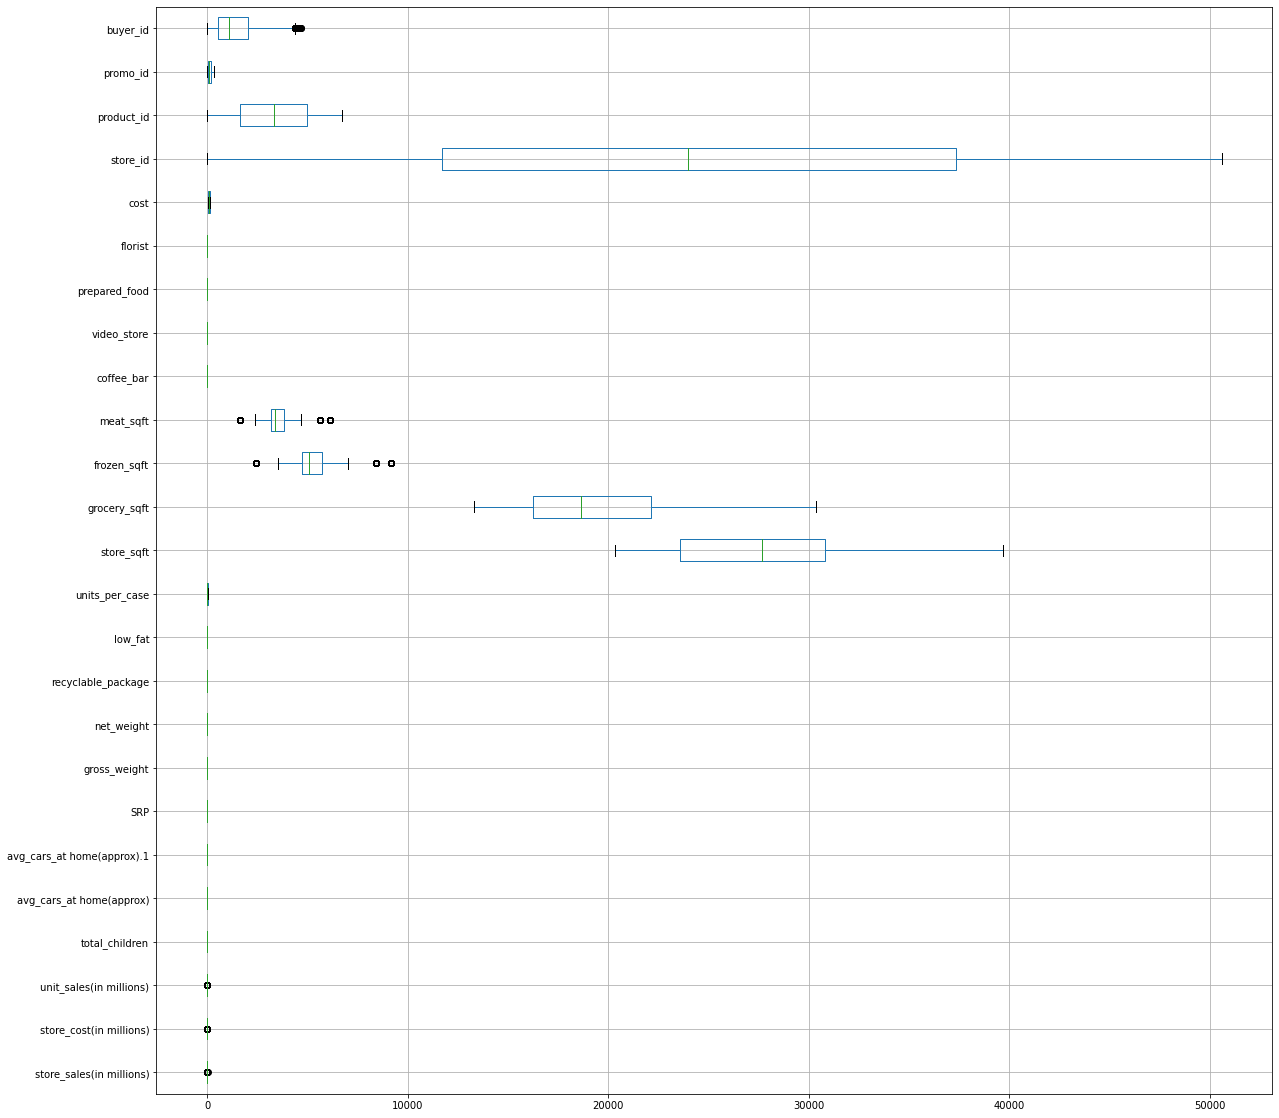

In [ ]:
# mengecek keberadaan outlier
df_unique.boxplot(vert=False,figsize=(20,20))

In [ ]:
data = df_unique.copy()

In [ ]:
data

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1,1,1,1
1,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
3,Kitchen Products,Household,Non-Consumable,11.85,4.6215,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,42997,5422,1,1
4,Snack Foods,Snack Foods,Food,1.98,0.6732,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,46490,5929,1,1
5,Snack Foods,Snack Foods,Food,10.74,4.1886,3.0,Bag Stuffers,USA,M,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,8057,906,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63603,Fruit,Canned Products,Food,1.40,0.6580,1.0,Shelf Emptiers,USA,S,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,31674,3861,317,2433
63604,Bread,Baked Goods,Food,1.65,0.7260,1.0,Shelf Emptiers,USA,S,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,36112,4461,317,2433
63605,Breakfast Foods,Breakfast Foods,Food,2.35,1.1045,1.0,Shelf Emptiers,USA,S,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,42239,5312,317,2433
63606,Packaged Vegetables,Produce,Food,4.34,1.9530,2.0,Shelf Emptiers,USA,S,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,49531,6356,317,2433


## Data Encoding

In [ ]:
data_encoded = data

### Encoding Data Pembeli

In [ ]:
# Income
data_encoded['avg. yearly_income'] = data['avg. yearly_income'].map({'$10K - $30K': 20000,
                                           '$30K - $50K': 40000, '$70K - $90K': 80000,
                                           '$50K - $70K': 60000, '$110K - $130K': 120000,
                                           '$90K - $110K': 100000, '$150K +': 160000,
                                           '$130K - $150K': 140000})

In [ ]:
# Member Card
data_encoded['member_card'] = data['member_card'].map({'Normal': 0, 'Bronze': 1,
                                           'Silver': 2, 'Golden': 3})
data_encoded['member_card']

0        0
1        0
3        0
4        0
5        0
        ..
63603    1
63604    1
63605    1
63606    1
63607    2
Name: member_card, Length: 61628, dtype: int64

In [ ]:
# Education
data_encoded['education'] = data['education'].map({'Partial High School': 1,
                                           'High School Degree': 2, 'Partial College': 3,
                                           'Bachelors Degree': 4, 'Graduate Degree': 5})
data_encoded['education']

0        1.0
1        1.0
3        1.0
4        1.0
5        1.0
        ... 
63603    5.0
63604    5.0
63605    5.0
63606    5.0
63607    3.0
Name: education, Length: 61628, dtype: float64

In [ ]:
# House Owner
data_encoded['houseowner'] = data['houseowner'].map({'Y': 1, 'N': 0})
data_encoded['houseowner']

0        1
1        1
3        1
4        1
5        1
        ..
63603    1
63604    1
63605    1
63606    1
63607    0
Name: houseowner, Length: 61628, dtype: int64

In [ ]:
# Marital Status
data_encoded['marital_status'] = data['marital_status'].map({'M': 1, 'S': 0})
data_encoded['marital_status']

0        1
1        1
3        1
4        1
5        1
        ..
63603    0
63604    0
63605    0
63606    0
63607    0
Name: marital_status, Length: 61628, dtype: int64

In [ ]:
data_archive_1 = data
data = data_encoded

### Encoding Data Toko

In [ ]:
data_encoded['store_type'] = data['store_type'].map({'Deluxe Supermarket': 4,
                                           'Supermarket': 3, 'Small Grocery': 1,
                                           'Gourmet Supermarket': 5, 'Mid-Size Grocery': 2})
data_encoded['store_type']

0        4
1        4
3        4
4        4
5        4
        ..
63603    1
63604    1
63605    1
63606    1
63607    1
Name: store_type, Length: 61628, dtype: int64

In [ ]:
data_encoded['store_city'] = data['store_city'].map({'Salem':0,'Bremerton':1,'Los Angeles':2,
                                                     'Portland':3,'Seattle':4,'San Francisco':5,
                                                     'Beverly Hills':6,'Tacoma':7,'Bellingham':8,
                                                     'Spokane':9,'Orizaba':10,'Merida':11,
                                                     'Guadalajara':12,'Mexico City':13,'Camacho':14,
                                                     'Hidalgo':15,'Acapulco':16,'Vancouver':17,'Victoria':18})
data_encoded['store_city']

0        0
1        0
3        0
4        0
5        0
        ..
63603    5
63604    5
63605    5
63606    5
63607    5
Name: store_city, Length: 61628, dtype: int64

In [ ]:
data_encoded['store_state'] = data['store_state'].map({'OR':0,'WA':1,'CA':2,
                                                                     'Veracruz':3,'Yucatan':4,
                                                                     'Jalisco':5,'DF':6,
                                                                     'Zacatecas':7,'Guerrero':8,
                                                                     'BC':9})
data_encoded['store_state']

0        0
1        0
3        0
4        0
5        0
        ..
63603    2
63604    2
63605    2
63606    2
63607    2
Name: store_state, Length: 61628, dtype: int64

In [ ]:
data = data_encoded

## Object Filtering

In [ ]:
data[data.notna()]

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1,1,1,1
1,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
3,Kitchen Products,Household,Non-Consumable,11.85,4.6215,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,42997,5422,1,1
4,Snack Foods,Snack Foods,Food,1.98,0.6732,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,46490,5929,1,1
5,Snack Foods,Snack Foods,Food,10.74,4.1886,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,8057,906,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63603,Fruit,Canned Products,Food,1.40,0.6580,1.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,31674,3861,317,2433
63604,Bread,Baked Goods,Food,1.65,0.7260,1.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,36112,4461,317,2433
63605,Breakfast Foods,Breakfast Foods,Food,2.35,1.1045,1.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,42239,5312,317,2433
63606,Packaged Vegetables,Produce,Food,4.34,1.9530,2.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,49531,6356,317,2433


In [ ]:
df_rel_clean = data[data['store_cost(in millions)'].notna()]
df_unknown = data[data['store_cost(in millions)'].isna()]

In [ ]:
cek_null(df_unique)
df_unique.shape

                          Total   Percent
education                  1200  0.019472
store_sales(in millions)   1200  0.019472
store_cost(in millions)    1200  0.019472
recyclable_package         1200  0.019472
food_family                1200  0.019472


(61628, 42)

In [ ]:
cek_null(df_rel_clean)
cek_null(df_unknown)
df_rel_clean.shape

Empty DataFrame
Columns: [Total, Percent]
Index: []
                          Total  Percent
education                  1200      1.0
store_sales(in millions)   1200      1.0
store_cost(in millions)    1200      1.0
recyclable_package         1200      1.0
food_family                1200      1.0


(60428, 42)

In [ ]:
df_unknown

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
3268,Starchy Foods,Starchy Foods,NaN,NaN,NaN,2.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6712,1,4384
3269,Starchy Foods,Starchy Foods,NaN,NaN,NaN,5.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6723,1,4394
3270,Starchy Foods,Starchy Foods,NaN,NaN,NaN,4.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6715,1,4408
3271,Starchy Foods,Starchy Foods,NaN,NaN,NaN,4.0,Bag Stuffers,USA,0,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6726,1,4398
3272,Starchy Foods,Starchy Foods,NaN,NaN,NaN,3.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6722,1,4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63504,Dairy,Dairy,NaN,NaN,NaN,1.0,Super Duper Savers,USA,0,F,...,1.0,0.0,0.0,0.0,Sunday Paper,124.30,50574,6582,302,3894
63539,Dairy,Dairy,NaN,NaN,NaN,2.0,Best Savings,Mexico,1,M,...,1.0,0.0,0.0,0.0,Cash Register Handout,146.32,50583,6561,305,4307
63549,Dairy,Dairy,NaN,NaN,NaN,3.0,Super Wallet Savers,Mexico,0,F,...,1.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",69.15,50583,6565,307,4310
63576,Dairy,Dairy,NaN,NaN,NaN,2.0,Three for One,USA,1,F,...,1.0,0.0,0.0,0.0,Cash Register Handout,136.43,50585,6630,321,4354


In [ ]:
data = df_rel_clean

## Object Grouping

In [ ]:
data_promo = data[['promo_id', 'promotion_name', 'sales_country', 'media_type', 'cost']].drop_duplicates(inplace = False)
data_promo.describe()

,promo_id,cost
count,331.000000,331.000000
mean,166.000000,101.028066
std,95.695698,29.624523
min,1.000000,50.790000
25%,83.500000,74.210000
50%,166.000000,101.960000
75%,248.500000,126.430000
max,331.000000,149.750000


In [ ]:
data_store = data[['store_id', 'store_type', 'store_city', 'store_state', 'store_sqft',
               'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
               'video_store', 'prepared_food', 'florist',
               'store_sales(in millions)', 'store_cost(in millions)']].drop_duplicates(inplace = False)
data_store.describe()

,store_id,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist,store_sales(in millions),store_cost(in millions)
count,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000,50572.000000
mean,25286.500000,3.460077,7.725243,2.931840,28041.634224,19190.687040,5310.611069,3540.353595,0.606877,0.348493,0.582239,0.554220,6.604433,2.643600
std,14599.023244,0.892630,5.398511,2.892319,5741.288830,4041.704838,1585.178691,1056.655709,0.488449,0.476498,0.493195,0.497056,3.554489,1.488797
min,1.000000,1.000000,0.000000,0.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.510000,0.163200
25%,12643.750000,3.000000,3.000000,1.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,3.780000,1.483500
50%,25286.500000,3.000000,7.000000,2.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,5.980000,2.401400
75%,37929.250000,4.000000,12.000000,5.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,8.820000,3.540600
max,50572.000000,5.000000,18.000000,9.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,22.920000,9.726500


In [ ]:
data_stock = data[['product_id', 'food_category', 'food_department', 'food_family', 'brand_name',
               'SRP', 'gross_weight', 'net_weight', 'recyclable_package',
               'low_fat', 'units_per_case', 'unit_sales(in millions)']].drop_duplicates(inplace = False)
data_stock.describe()

,product_id,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,unit_sales(in millions)
count,6534.000000,6534.000000,6534.000000,6534.000000,6534.000000,6534.000000,6534.000000,6534.000000
mean,3267.500000,2.117926,13.813457,11.802339,0.560300,0.350015,18.939088,3.166208
std,1886.347661,0.931173,4.638726,4.702523,0.496389,0.477011,10.206934,1.267854
min,1.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,1.000000
25%,1634.250000,1.412500,9.662500,7.690000,0.000000,0.000000,10.000000,2.000000
50%,3267.500000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,3.000000
75%,4900.750000,2.800000,17.800000,16.000000,1.000000,1.000000,28.000000,4.000000
max,6534.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,6.000000


In [ ]:
data_buyer = data[['buyer_id', 'marital_status', 'gender', 'total_children', 'education',
               'member_card', 'occupation', 'houseowner',
               'avg_cars_at home(approx)', 'avg. yearly_income',
               'sales_country']].drop_duplicates(inplace = False)
data_buyer.describe()

,buyer_id,marital_status,total_children,education,member_card,houseowner,avg_cars_at home(approx),avg. yearly_income
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,1923.000000,0.498570,2.542523,2.589337,1.201300,0.605722,2.317555,63511.053316
std,1110.100221,0.500063,1.518041,1.291790,0.885511,0.488759,1.090979,37241.655304
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20000.000000
25%,962.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,40000.000000
50%,1923.000000,0.000000,3.000000,2.000000,1.000000,1.000000,2.000000,60000.000000
75%,2884.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,80000.000000
max,3845.000000,1.000000,5.000000,5.000000,3.000000,1.000000,4.000000,160000.000000


# Explorasi

Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat) Mahasiswa perlu menambahkan dua poin eksplorasi sendiri.


## Explorasi Wajib

*   Nama promosi apa yang memiliki store sales paling besar?

In [ ]:
df_sales = data[['store_sales(in millions)', 'promotion_name', 'promo_id']]

In [ ]:
df_sales.head(5)

,store_sales(in millions),promotion_name,promo_id
0,7.36,Bag Stuffers,1
1,8.91,Bag Stuffers,1
3,11.85,Bag Stuffers,1
4,1.98,Bag Stuffers,1
5,10.74,Bag Stuffers,1


In [ ]:
# if  df_sales[['prommotion_name']] is same
# sum of df_sales['store_sales(in millions)'] f
df_sales_grouped = df_sales[['store_sales(in millions)',
                             'promotion_name']].groupby(['promotion_name'],
                                                        as_index = False).sum()
df_sales_grouped.sort_values('store_sales(in millions)', ascending=False)

,promotion_name,store_sales(in millions)
47,Weekend Markdown,15378.81
26,Price Savers,15290.61
43,Two Day Sale,15201.72
29,Price Winners,13925.79
33,Save-It Sale,13227.02
39,Super Savers,12858.23
38,Super Duper Savers,12841.17
22,One Day Sale,11658.77
18,High Roller Savings,11548.20
11,Double Down Sale,11443.00


*   Bagaimana hubungan korelasi antar fitur fitur yang ada? Fitur mana yang paling berkorelasi dari data tersebut?  

In [ ]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1,1,1,1
1,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
3,Kitchen Products,Household,Non-Consumable,11.85,4.6215,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,42997,5422,1,1
4,Snack Foods,Snack Foods,Food,1.98,0.6732,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,46490,5929,1,1
5,Snack Foods,Snack Foods,Food,10.74,4.1886,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,8057,906,1,1


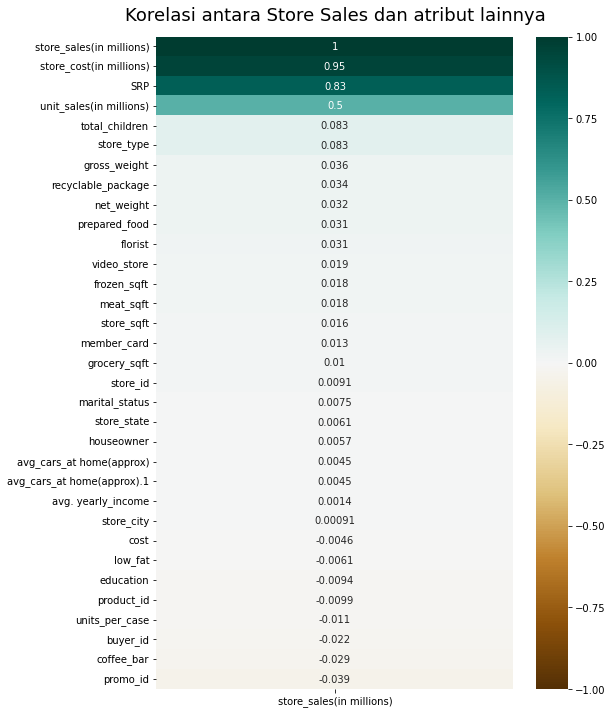

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['store_sales(in millions)']].sort_values(
    by='store_sales(in millions)', ascending=False), vmin=-1, vmax=1,
    annot=True, cmap='BrBG')
heatmap.set_title('Korelasi antara Store Sales dan atribut lainnya',
                  fontdict={'fontsize':18}, pad=16);

*   Visualisasikan dengan menggunakan tools yang kamu ketahui negara negara asal penjualan produk!

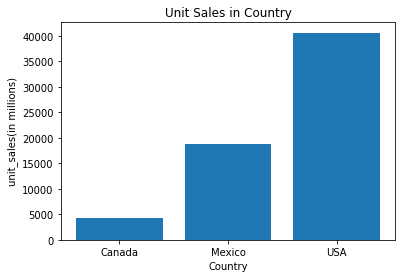

In [ ]:
df_sales_country = df_rel[['sales_country','unit_sales(in millions)']].groupby(
    ['sales_country'], as_index = False).count()
df_sales_country

plt.bar(df_sales_country['sales_country'], df_sales_country['unit_sales(in millions)'])

plt.title("Unit Sales in Country")

# Setting the X and Y labels
plt.xlabel('Country')
plt.ylabel('unit_sales(in millions)')

# Adding the legends
plt.show()

*   Untuk setiap kategori makanan, brand apa yang paling banyak dibeli customer?

In [ ]:
df_sales_country = df_rel[['brand_name','unit_sales(in millions)']].groupby(
    ['brand_name'], as_index = False).count()
# for i in df_sales_country:
#     if df_sales_country['unit_sales(in millions)'][i] == df_sales_country[
    # 'unit_sales(in millions)'].max():
#         df_sales_country

maxValueIndex = df_sales_country['unit_sales(in millions)'].idxmax()
df_sales_country.iloc[maxValueIndex]

brand_name                 Hermanos
unit_sales(in millions)        1848
Name: 54, dtype: object

## Explorasi Mandiri

### 1.   Korelasi Media Promosi dengan Okupasi pembeli



Informasi ini akan memberikan gambaran mengenai target audiens dari masing-masing media promosi. Informasi ini akan berguna untuk membantu pemilihan media promosi yang lebih sesuai dengan target audiens.

In [ ]:
df_promosi_okupasi = data[['promo_id', 'media_type',
                       'buyer_id', 'occupation']]
df_promosi_okupasi

,promo_id,media_type,buyer_id,occupation
0,1,"Daily Paper, Radio",1,Skilled Manual
1,1,"Daily Paper, Radio",1,Skilled Manual
3,1,"Daily Paper, Radio",1,Skilled Manual
4,1,"Daily Paper, Radio",1,Skilled Manual
5,1,"Daily Paper, Radio",1,Skilled Manual
...,...,...,...,...
63603,317,Product Attachment,2433,Management
63604,317,Product Attachment,2433,Management
63605,317,Product Attachment,2433,Management
63606,317,Product Attachment,2433,Management


In [ ]:
df_po_1 = pd.get_dummies(df_promosi_okupasi.drop(['media_type'], axis=1),
                         prefix='occupation')
df_po_1

,promo_id,buyer_id,occupation_Clerical,occupation_Management,occupation_Manual,occupation_Professional,occupation_Skilled Manual
0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,1
3,1,1,0,0,0,0,1
4,1,1,0,0,0,0,1
5,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...
63603,317,2433,0,1,0,0,0
63604,317,2433,0,1,0,0,0
63605,317,2433,0,1,0,0,0
63606,317,2433,0,1,0,0,0


In [ ]:
df_po_2 = pd.get_dummies(df_promosi_okupasi.drop(['occupation'], axis=1),
                         prefix='media_type')
df_po_2

,promo_id,buyer_id,media_type_Bulk Mail,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63603,317,2433,0,0,0,0,0,0,1,0,0,0,0,0,0
63604,317,2433,0,0,0,0,0,0,1,0,0,0,0,0,0
63605,317,2433,0,0,0,0,0,0,1,0,0,0,0,0,0
63606,317,2433,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_po_merged = pd.merge(df_po_1, df_po_2)
df_po_grouped = df_po_merged.groupby(['promo_id', 'buyer_id'],
                                    as_index = False).sum()
df_po_grouped

,promo_id,buyer_id,occupation_Clerical,occupation_Management,occupation_Manual,occupation_Professional,occupation_Skilled Manual,media_type_Bulk Mail,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,1,1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,0.0,0.0,121.0,0.0,0.0,0.0,0.0,0.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,12,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,14,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,17,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12129,330,3320,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
12130,331,1357,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12131,331,2030,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12132,331,2529,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


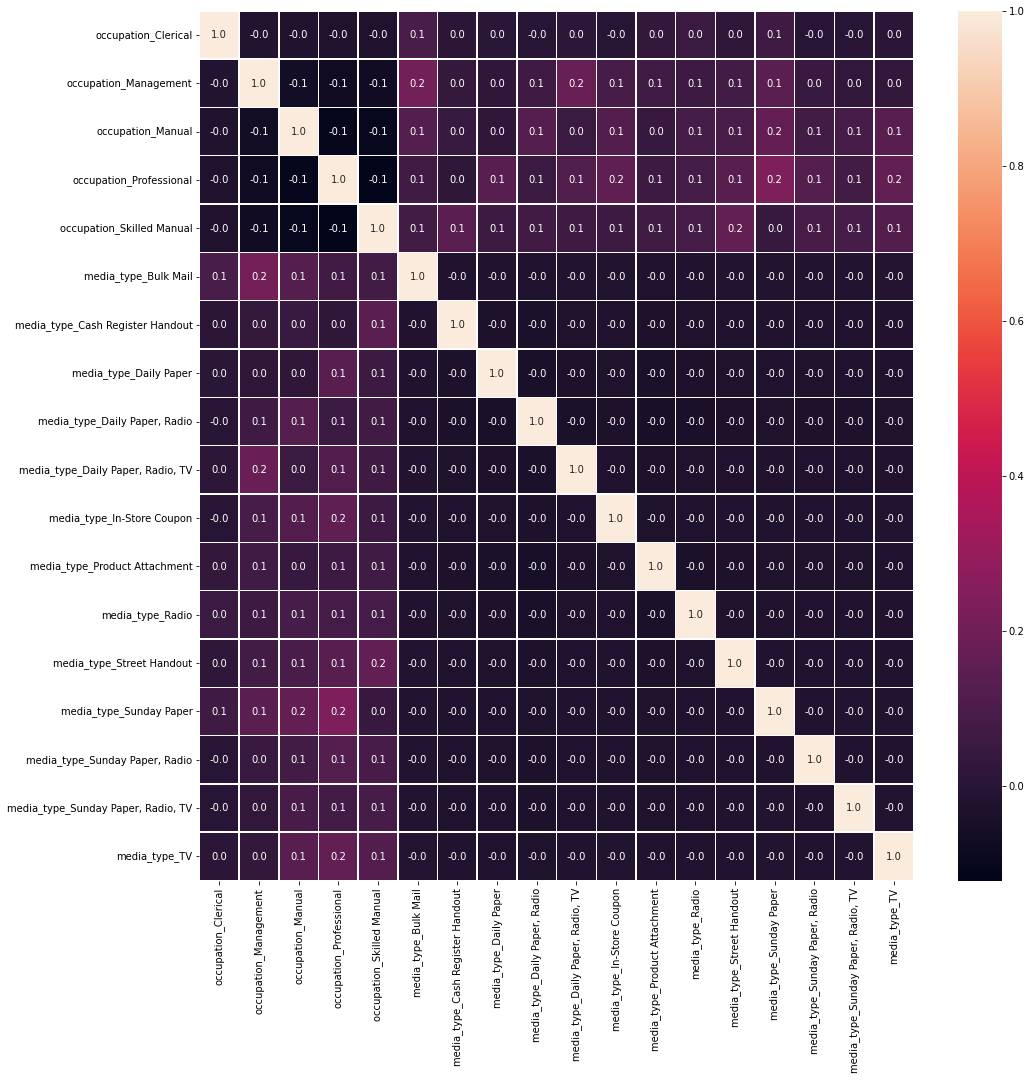

In [ ]:
df_po_corr = df_po_grouped.drop(['promo_id', 'buyer_id'],
                              axis=1).corr(method='pearson')
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df_po_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Informasi ini menunjukkan bahwa tidak ada korelasi diantara media promosi dengan pekerjaan pembeli. Hal ini berarti bahwa tidak ada media spesifik yang bisa digunakan untuk menargetkan audiens pembeli tertentu. Dengan kata lain, tidak ada pengaruh dari media promosi terhadap jenis audiens pembeli yang berbeda.

### 2.   Korelasi penjualan barang dan harga promosi

Informasi ini akan memberikan gambaran mengenai effek dari promosi terhadap penjualan produk yang dijual.

In [ ]:
df_pro_sale = data[['product_id', 'promo_id', 'occupation', 'brand_name', 'promotion_name', 'unit_sales(in millions)',
                       'cost']]
df_pro_sale.head()

,product_id,promo_id,occupation,brand_name,promotion_name,unit_sales(in millions),cost
0,1,1,Skilled Manual,Carrington,Bag Stuffers,4.0,126.62
1,127,1,Skilled Manual,BBB Best,Bag Stuffers,3.0,126.62
3,5422,1,Skilled Manual,Cormorant,Bag Stuffers,3.0,126.62
4,5929,1,Skilled Manual,Fort West,Bag Stuffers,3.0,126.62
5,906,1,Skilled Manual,Nationeel,Bag Stuffers,3.0,126.62


In [ ]:
df_ps_grouped = df_pro_sale.groupby(['promo_id', 'product_id'],
                                    as_index = False).sum()
df_ps_grouped

,promo_id,product_id,unit_sales(in millions),cost
0,1,1,4.0,126.62
1,1,9,3.0,126.62
2,1,25,3.0,126.62
3,1,29,2.0,126.62
4,1,30,3.0,126.62
...,...,...,...,...
58748,331,4015,2.0,101.57
58749,331,4770,2.0,101.57
58750,331,5376,2.0,101.57
58751,331,5848,1.0,101.57


In [ ]:
df_ps_merged = pd.merge(df_ps_grouped, df_pro_sale.drop(['unit_sales(in millions)',
                                                         'cost'], axis=1))
df_ps_merged.head()

,promo_id,product_id,unit_sales(in millions),cost,occupation,brand_name,promotion_name
0,1,1,4.0,126.62,Skilled Manual,Carrington,Bag Stuffers
1,1,9,3.0,126.62,Skilled Manual,PigTail,Bag Stuffers
2,1,25,3.0,126.62,Professional,Great,Bag Stuffers
3,1,29,2.0,126.62,Management,Great,Bag Stuffers
4,1,30,3.0,126.62,Professional,Sphinx,Bag Stuffers


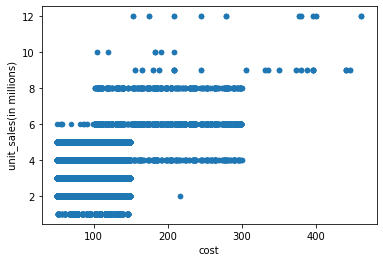

In [ ]:
df_ps_merged.plot.scatter(x="cost", y='unit_sales(in millions)', figsize=(6,4))

In [ ]:
df_ps_norm = df_ps_merged[['unit_sales(in millions)', 'cost']].apply(zscore)
df_ps_norm

,unit_sales(in millions),cost
0,0.642123,0.555053
1,-0.235318,0.555053
2,-0.235318,0.555053
3,-1.112760,0.555053
4,-0.235318,0.555053
...,...,...
60423,-1.112760,-0.079989
60424,-1.112760,-0.079989
60425,-1.112760,-0.079989
60426,-1.990201,-0.079989


In [ ]:
df_ps_norm2 = df_ps_merged.drop(['unit_sales(in millions)', 'cost'],
                                axis=1).join(df_ps_norm)
df_ps_norm2

,promo_id,product_id,occupation,brand_name,promotion_name,unit_sales(in millions),cost
0,1,1,Skilled Manual,Carrington,Bag Stuffers,0.642123,0.555053
1,1,9,Skilled Manual,PigTail,Bag Stuffers,-0.235318,0.555053
2,1,25,Professional,Great,Bag Stuffers,-0.235318,0.555053
3,1,29,Management,Great,Bag Stuffers,-1.112760,0.555053
4,1,30,Professional,Sphinx,Bag Stuffers,-0.235318,0.555053
...,...,...,...,...,...,...,...
60423,331,4015,Clerical,Giant,Sales Days,-1.112760,-0.079989
60424,331,4770,Manual,Imagine,Sales Days,-1.112760,-0.079989
60425,331,5376,Professional,Consolidated,Sales Days,-1.112760,-0.079989
60426,331,5848,Professional,Carrington,Sales Days,-1.990201,-0.079989


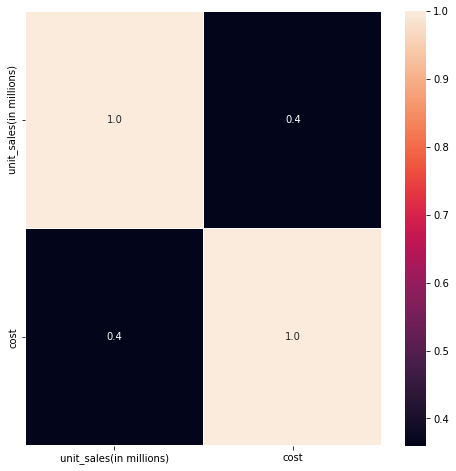

In [ ]:
df_ps_corr = df_ps_norm2.drop(['promo_id', 'product_id'],
                              axis=1).corr(method='pearson')
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_ps_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Hasil menunjukkan bahwa harga promosi tidak tentu mempengaruhi penjualan individual barang yang dipromosikan.

In [ ]:
df_ps_pro = df_pro_sale.drop(['product_id'], axis=1).groupby(['promo_id', 'cost'],
                                as_index = False).sum()
df_ps_pro

,promo_id,cost,unit_sales(in millions)
0,1,126.62,1835.0
1,2,59.86,2218.0
2,3,84.16,710.0
3,4,95.78,798.0
4,5,50.79,745.0
...,...,...,...
326,327,69.24,23.0
327,328,119.62,58.0
328,329,129.64,40.0
329,330,123.72,49.0


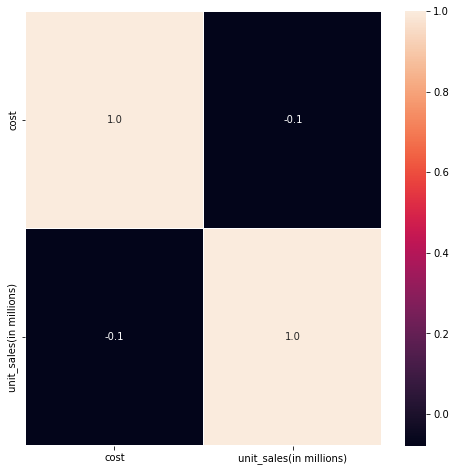

In [ ]:
df_ps_corr2 = df_ps_pro.drop(['promo_id'],
                              axis=1).corr(method='pearson')
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_ps_corr2, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Hasil dari korelasi ini menunjukkan dengan lebih pasti bahwa harga promosi tidak tentu menghasilkan penjualan yang lebih besar.

# Modeling

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Informasi lebih lengkap: ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
data

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1,1,1,1
1,Baking Goods,Baking Goods,Food,8.91,4.0095,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,1148,127,1,1
3,Kitchen Products,Household,Non-Consumable,11.85,4.6215,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,42997,5422,1,1
4,Snack Foods,Snack Foods,Food,1.98,0.6732,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,46490,5929,1,1
5,Snack Foods,Snack Foods,Food,10.74,4.1886,3.0,Bag Stuffers,USA,1,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,8057,906,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63603,Fruit,Canned Products,Food,1.40,0.6580,1.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,31674,3861,317,2433
63604,Bread,Baked Goods,Food,1.65,0.7260,1.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,36112,4461,317,2433
63605,Breakfast Foods,Breakfast Foods,Food,2.35,1.1045,1.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,42239,5312,317,2433
63606,Packaged Vegetables,Produce,Food,4.34,1.9530,2.0,Shelf Emptiers,USA,0,F,...,1.0,0.0,0.0,0.0,Product Attachment,101.75,49531,6356,317,2433


# Modeling Wajib

Buatlah beberapa model yang mungkin akan diperlukan, diantaranya: (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat)


## 1.   Buatlah model klasifikasi untuk mengklasifikasikan ketersediaan makanan siap saji (prepared_food) dari tempat customer membeli!

In [ ]:
# Try Logisitic Regression, Random Forest, gradient boosted

Target Prediksi: prepared_food

> df toko -florist, bar, video store



In [ ]:
df_model_prep = data_store
df_model_prep = df_model_prep.drop(['store_id', 'store_type','store_city','store_state','coffee_bar','video_store','florist', 'prepared_food'], axis=1)
df_model_prep.head()

,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,store_sales(in millions),store_cost(in millions)
0,27694.0,18670.0,5415.0,3610.0,7.36,2.7232
1,27694.0,18670.0,5415.0,3610.0,8.91,4.0095
3,27694.0,18670.0,5415.0,3610.0,11.85,4.6215
4,27694.0,18670.0,5415.0,3610.0,1.98,0.6732
5,27694.0,18670.0,5415.0,3610.0,10.74,4.1886


In [ ]:
df_target_prep = data_store['prepared_food']
df_target_prep.head()

0    1.0
1    1.0
3    1.0
4    1.0
5    1.0
Name: prepared_food, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_model_prep, df_target_prep,
                                                    test_size = 0.2, stratify=df_target_prep,random_state = 1019)

### Decision Tree Classifier

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4226
         1.0       1.00      1.00      1.00      5889

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,4226,0
1.0,0,5889




Informasi lebih lengkap: 
F1 Macro Average: 1.0
F1 Micro Average: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0



[Text(152.1818181818182, 195.696, 'X[2] <= 4967.0\ngini = 0.486\nsamples = 40457\nvalue = [16901, 23556]'),
 Text(91.30909090909091, 152.208, 'X[3] <= 2780.5\ngini = 0.362\nsamples = 16867\nvalue = [12865, 4002]'),
 Text(60.872727272727275, 108.72, 'X[3] <= 2562.5\ngini = 0.495\nsamples = 8906\nvalue = [4904, 4002]'),
 Text(30.436363636363637, 65.232, 'gini = 0.0\nsamples = 4904\nvalue = [4904, 0]'),
 Text(91.30909090909091, 65.232, 'gini = 0.0\nsamples = 4002\nvalue = [0, 4002]'),
 Text(121.74545454545455, 108.72, 'gini = 0.0\nsamples = 7961\nvalue = [7961, 0]'),
 Text(213.05454545454546, 152.208, 'X[1] <= 15174.5\ngini = 0.284\nsamples = 23590\nvalue = [4036, 19554]'),
 Text(182.61818181818182, 108.72, 'gini = 0.0\nsamples = 2969\nvalue = [2969, 0]'),
 Text(243.4909090909091, 108.72, 'X[3] <= 5159.0\ngini = 0.098\nsamples = 20621\nvalue = [1067, 19554]'),
 Text(213.05454545454546, 65.232, 'gini = 0.0\nsamples = 17154\nvalue = [0, 17154]'),
 Text(273.92727272727274, 65.232, 'X[0] <= 3

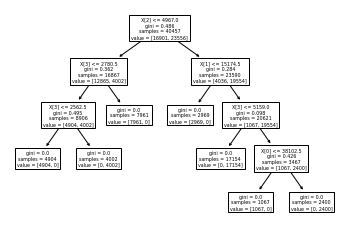

In [ ]:
from sklearn import tree

tree.plot_tree(clf)

In [ ]:
plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Prediksi data test
y_pred_NB = modelnb.predict(x_test)
y_pred_NB

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Array data test
np.array(y_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
evaluate_classifier_performance(y_pred_NB,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68      4226
         1.0       0.78      0.72      0.75      5889

    accuracy                           0.72     10115
   macro avg       0.71      0.72      0.71     10115
weighted avg       0.72      0.72      0.72     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,3019,1207
1.0,1644,4245




Informasi lebih lengkap: 
F1 Macro Average: 0.7139388713729606
F1 Micro Average: 0.7181413741967375
Precision Macro Average: 0.7130253125202083
Precision Micro Average: 0.7181413741967375
Recall Macro Average: 0.71761129162097
Recall Micro Average: 0.7181413741967375



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate the model (using the default parameters)
logistic_reg = LogisticRegression(random_state=1019)

# fit the model with data
logistic_reg.fit(x_train, y_train)

y_pred_LR = logistic_reg.predict(x_test)

In [ ]:
y_pred_LR

array([0., 1., 0., ..., 1., 1., 1.])

In [ ]:
np.array(y_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
evaluate_classifier_performance(y_pred_LR,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       0.79      0.36      0.49      4226
         1.0       0.67      0.93      0.78      5889

    accuracy                           0.69     10115
   macro avg       0.73      0.64      0.64     10115
weighted avg       0.72      0.69      0.66     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,1511,2715
1.0,400,5489




Informasi lebih lengkap: 
F1 Macro Average: 0.6356956450551177
F1 Micro Average: 0.6920415224913494
Precision Macro Average: 0.7298746881267603
Precision Micro Average: 0.6920415224913494
Recall Macro Average: 0.6448126312486956
Recall Micro Average: 0.6920415224913494



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state = 1019)

random_forest.fit(x_train, y_train)

y_pred_RF = random_forest.predict(x_test)

In [ ]:
y_pred_RF

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
np.array(y_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
evaluate_classifier_performance(y_pred_RF,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4226
         1.0       1.00      1.00      1.00      5889

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,4226,0
1.0,0,5889




Informasi lebih lengkap: 
F1 Macro Average: 1.0
F1 Micro Average: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0



### Gradient Boosted

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_boosted = GradientBoostingClassifier(random_state = 1019)

grad_boosted.fit(x_train, y_train)

y_pred_GB = grad_boosted.predict(x_test)

In [ ]:
y_pred_GB

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
np.array(y_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
evaluate_classifier_performance(y_pred_GB,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4226
         1.0       1.00      1.00      1.00      5889

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,4226,0
1.0,0,5889




Informasi lebih lengkap: 
F1 Macro Average: 1.0
F1 Micro Average: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0



### Cross Validation

Because Random Forest and Gradient Boosted have a 100% prediction rate, test again with Cross Validation to ensure not overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_RF = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 10, 50],
               'max_depth' : [5, 10, 12, None]}

cv_RF = GridSearchCV(estimator=random_forest,
                   param_grid=param_grid_RF, cv= 5)

cv_RF.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1019),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [2, 10, 50]})

In [ ]:
cv_RF.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
best_hp_rf = RandomForestClassifier(random_state = 1019, **cv_RF.best_params_)
best_hp_rf.fit(x_train, y_train)
predicted_rf = best_hp_rf.predict(x_test)
evaluate_classifier_performance(predicted_rf,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4226
         1.0       1.00      1.00      1.00      5889

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,4226,0
1.0,0,5889




Informasi lebih lengkap: 
F1 Macro Average: 1.0
F1 Micro Average: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0



In [ ]:
param_grid_GB = {'loss': ['deviance', 'exponential'],
               'learning_rate': [0.1, 0.2, 0.5],
               'criterion' : ['friedman_mse', 'squared_error']}

cv_GB = GridSearchCV(estimator=grad_boosted,
                   param_grid=param_grid_GB, cv= 5)

cv_GB.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_clas

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1019),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.5],
                         'loss': ['deviance', 'exponential']})

In [ ]:
cv_GB.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance'}

In [ ]:
best_hp_gb = GradientBoostingClassifier(random_state = 1019, **cv_GB.best_params_)
best_hp_gb.fit(x_train, y_train)
predicted_gb = best_hp_gb.predict(x_test)
evaluate_classifier_performance(predicted_gb,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4226
         1.0       1.00      1.00      1.00      5889

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115



Confusion Matrix



prediction,0.0,1.0
actual,,
0.0,4226,0
1.0,0,5889




Informasi lebih lengkap: 
F1 Macro Average: 1.0
F1 Micro Average: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0



Kesimpulan dari CV adalah:

## 2.   Model memprediksi store_cost

Buatlah model untuk memprediksi store_cost untuk masing masing penjualan!

Target Prediksi: store_cost(in millions) **Regression**

Assumed Related Data Columns : store_sales(in millions), unit_sales(in millions), sales_country


In [ ]:
X = data_store.drop('store_cost(in millions)', axis=1)
y = data_store['store_cost(in millions)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1019)

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=1019)
dt_reg.fit(X_train, y_train)

y_pred_dtr = dt_reg.predict(X_test)

In [ ]:
y_pred_dtr

array([1.9456, 1.144 , 1.2098, ..., 1.536 , 2.3739, 1.472 ])

In [ ]:
metrics(y_pred_dtr)

MAE: 0.44902064383453294
MSE: 0.3811827844008543
RMSE: 0.6174000197609766
R_squared: 0.8264986316258516


In [ ]:
from sklearn import tree

In [ ]:
print(tree.export_text(dt_reg, feature_names=pd.Series(X.columns).array))

|--- store_sales(in millions) <= 7.33
|   |--- store_sales(in millions) <= 4.24
|   |   |--- store_sales(in millions) <= 2.73
|   |   |   |--- store_sales(in millions) <= 1.97
|   |   |   |   |--- store_sales(in millions) <= 1.45
|   |   |   |   |   |--- store_sales(in millions) <= 0.98
|   |   |   |   |   |   |--- store_sales(in millions) <= 0.75
|   |   |   |   |   |   |   |--- store_sales(in millions) <= 0.69
|   |   |   |   |   |   |   |   |--- store_sales(in millions) <= 0.56
|   |   |   |   |   |   |   |   |   |--- store_sales(in millions) <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- store_id <= 16068.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- store_id >  16068.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- store_sales(in millions) >  0.55
|   |   |   |   |   |   |   |   |   |   |--- store_state <= 1.50
|   |   |   |  

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Melakukan training pada model random forest
rf_reg = RandomForestRegressor(random_state=1019)
rf_reg.fit(X_train, y_train)

# Memprediksi data testing
y_pred_rfr = rf_reg.predict(X_test)

In [ ]:
y_pred_rfr

array([2.033666, 1.149906, 1.182589, ..., 1.667811, 2.37105 , 1.387826])

In [ ]:
metrics(y_pred_rfr)

MAE: 0.36383599462152966
MSE: 0.238749336946984
RMSE: 0.4886198286469594
R_squared: 0.8913294661934121


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Memprediksi data testing
y_pred_lr = lin_reg.predict(X_test)

In [ ]:
y_pred_lr

array([2.43114112, 1.17548028, 1.0500172 , ..., 1.53112487, 2.32964897,
       1.28191548])

In [ ]:
metrics(y_pred_lr)

MAE: 0.3329833699839491
MSE: 0.19192614373340786
RMSE: 0.438093761349563
R_squared: 0.9126417825588319


## 3.   Lakukan analisis cluster

Lakukan analisis cluster yang dapat terbentuk pada data dan deskripsikan karakteristik dari masing-masing cluster yang didapatkan!

### Toko

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data_store_clustering =data_store.copy()
data_store_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50572 entries, 0 to 63607
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  50572 non-null  int64  
 1   store_type                50572 non-null  int64  
 2   store_city                50572 non-null  int64  
 3   store_state               50572 non-null  int64  
 4   store_sqft                50572 non-null  float64
 5   grocery_sqft              50572 non-null  float64
 6   frozen_sqft               50572 non-null  float64
 7   meat_sqft                 50572 non-null  float64
 8   coffee_bar                50572 non-null  float64
 9   video_store               50572 non-null  float64
 10  prepared_food             50572 non-null  float64
 11  florist                   50572 non-null  float64
 12  store_sales(in millions)  50572 non-null  float64
 13  store_cost(in millions)   50572 non-null  float64
dtypes: flo

>Buang fitur yang kurang relevan

In [ ]:
df_clustering = data_store_clustering.drop(columns=['store_id'])

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

# Menggunakan np.array karena tidak semua kolom di df2 numerik
scaler = StandardScaler().fit(df_clustering)
scaled_data = scaler.transform(df_clustering)
normalized_data = normalize(scaled_data)
df_normalized = pd.DataFrame(scaled_data, columns = list(df_clustering.columns))

print(df_normalized)

       store_type  store_city  store_state  store_sqft  grocery_sqft  \
0        0.604874   -1.431009    -1.013674   -0.060550     -0.128830   
1        0.604874   -1.431009    -1.013674   -0.060550     -0.128830   
2        0.604874   -1.431009    -1.013674   -0.060550     -0.128830   
3        0.604874   -1.431009    -1.013674   -0.060550     -0.128830   
4        0.604874   -1.431009    -1.013674   -0.060550     -0.128830   
...           ...         ...          ...         ...           ...   
50567   -2.756014   -0.504819    -0.322181   -0.969066     -0.957449   
50568   -2.756014   -0.504819    -0.322181   -0.969066     -0.957449   
50569   -2.756014   -0.504819    -0.322181   -0.969066     -0.957449   
50570   -2.756014   -0.504819    -0.322181   -0.969066     -0.957449   
50571   -2.756014   -0.504819    -0.322181   -0.969066     -0.957449   

       frozen_sqft  meat_sqft  coffee_bar  video_store  prepared_food  \
0         0.065854   0.065913    0.804847     1.367295       0

>Gunakan PCA untuk mencari 2 fitur terbaik

In [ ]:
from sklearn.decomposition import PCA
nilai_n = 2
pca = PCA(n_components = nilai_n)
pca.fit(df_clustering)
df3_pca = pca.transform(df_normalized)

print(pca.explained_variance_ratio_)

persentase = 0
for i in pca.explained_variance_ratio_:
    persentase += i
print("Tercakup " + str(persentase*100) + "% explained variance")

[0.92885425 0.07114484]
Tercakup 99.99990906438532% explained variance


In [ ]:
fitur = []
for i in range(nilai_n):
    fitur.append(np.abs(pca.components_[i]).argmax())

# ambil nama fitur
namaFitur = []
for i in range(nilai_n):
    namaFitur.append(df_normalized.columns[fitur[i]])

namaFitur

#### **Clustering : K-means Clustering**

> Menentukan nilai k yang optimal dengan metrik silhouette coefficient

Untuk cluster sebanyak 2 rata-rata silhouette coefficientnya adalah : 0.6574917475589118
Untuk cluster sebanyak 3 rata-rata silhouette coefficientnya adalah : 0.6452102298982969
Untuk cluster sebanyak 4 rata-rata silhouette coefficientnya adalah : 0.6023050888936472
Untuk cluster sebanyak 5 rata-rata silhouette coefficientnya adalah : 0.6326868165675245
Untuk cluster sebanyak 6 rata-rata silhouette coefficientnya adalah : 0.6005023045482708


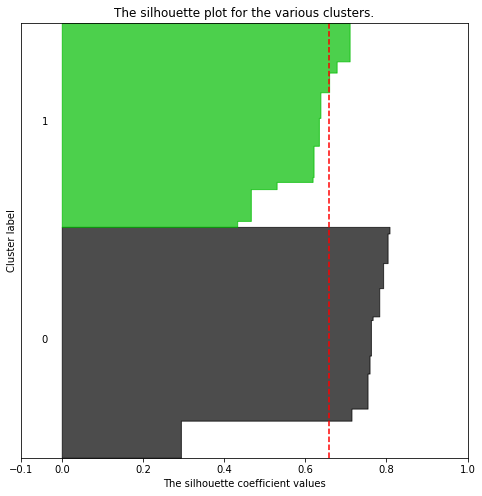

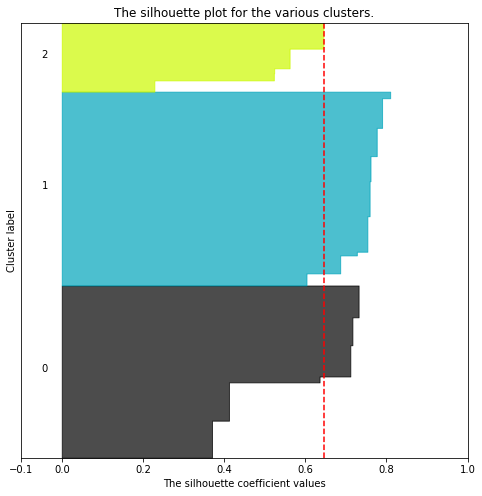

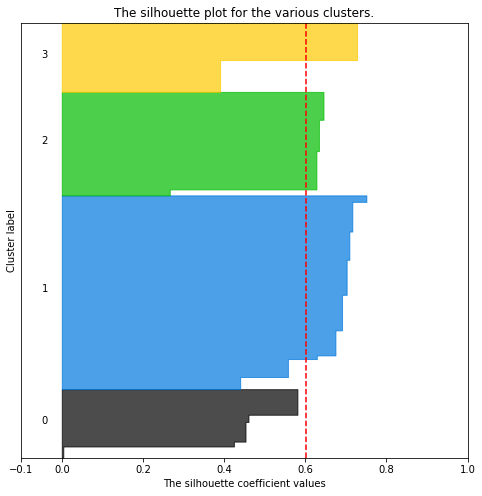

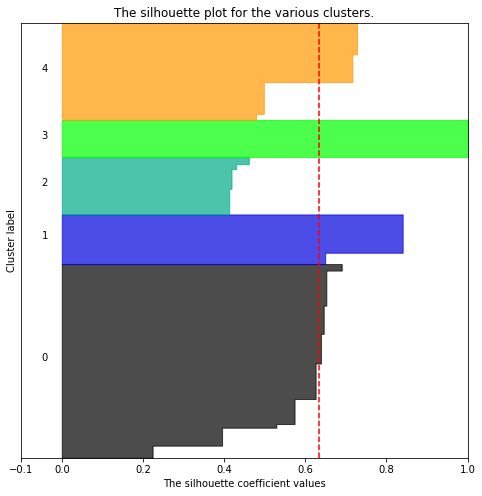

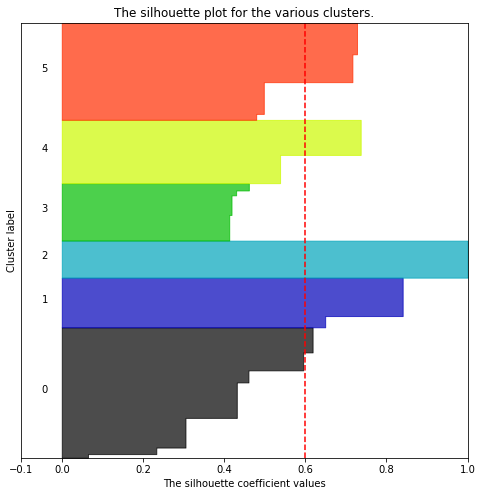

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

X = df_normalized[namaFitur].to_numpy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Untuk cluster sebanyak",
        n_clusters,
        "rata-rata silhouette coefficientnya adalah :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
# Ambil K dengan silhouette coefficient tertinggi
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)

print("Centroid cluster:")
for i in clusterer.cluster_centers_:
    print(i)

Centroid cluster:
[-0.81821737 -0.81320306]
[0.92669656 0.92101745]


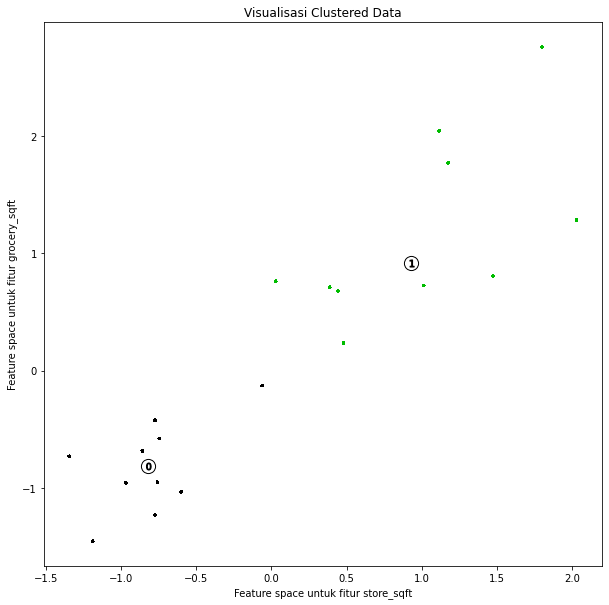

In [ ]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

n_clusters = 2

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax1.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax1.set_title("Visualisasi Clustered Data")
ax1.set_xlabel(f"Feature space untuk fitur {namaFitur[0]}")
ax1.set_ylabel(f"Feature space untuk fitur {namaFitur[1]}")

plt.show()

#### **Analisis**
- Cluster 0: toko dengan nilai `store_sqft` rendah, dan `store_cost` rendah. Contoh toko pada cluster ini adalah
- Cluster 1: toko dengan nilai `store_sqft` tinggi, dan `store_cost` tinggi. Contoh toko pada cluster ini adalah


### Product

In [ ]:
data_stock_clustering =data_stock.copy()
data_stock_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6534 entries, 0 to 63605
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               6534 non-null   int64  
 1   food_category            6534 non-null   object 
 2   food_department          6534 non-null   object 
 3   food_family              6534 non-null   object 
 4   brand_name               6534 non-null   object 
 5   SRP                      6534 non-null   float64
 6   gross_weight             6534 non-null   float64
 7   net_weight               6534 non-null   float64
 8   recyclable_package       6534 non-null   float64
 9   low_fat                  6534 non-null   float64
 10  units_per_case           6534 non-null   float64
 11  unit_sales(in millions)  6534 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 663.6+ KB


>Buang fitur yang kurang relevan


In [ ]:
df_clustering = data_stock_clustering.drop(columns=['product_id','food_category','food_department','food_family','brand_name'])

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

# Menggunakan np.array karena tidak semua kolom di df2 numerik
scaler = StandardScaler().fit(df_clustering)
scaled_data = scaler.transform(df_clustering)
normalized_data = normalize(scaled_data)
df_normalized = pd.DataFrame(scaled_data, columns = list(df_clustering.columns))

print(df_normalized)

           SRP  gross_weight  net_weight  recyclable_package   low_fat  \
0    -0.298492      1.269097    1.254244            0.885866 -0.733824   
1     0.915125     -0.067579   -0.064298           -1.128839  1.362724   
2     1.967641     -1.417191   -1.397727           -1.128839 -0.733824   
3    -1.565808     -0.563443   -0.555561            0.885866 -0.733824   
4     1.570263      0.126454    0.105837            0.885866 -0.733824   
...        ...           ...         ...                 ...       ...   
6529  0.625145      1.635605    1.807181            0.885866 -0.733824   
6530 -0.158872      1.312216    1.275511           -1.128839 -0.733824   
6531  0.496266      0.191132   -0.043031            0.885866  1.362724   
6532 -0.771051      0.881030    0.850175            0.885866  1.362724   
6533  0.249246      1.592486    1.573246           -1.128839  1.362724   

      units_per_case  unit_sales(in millions)  
0          -0.189992                 0.657691  
1          -0.3

>Gunakan PCA untuk mencari 2 fitur terbaik

In [ ]:
from sklearn.decomposition import PCA
nilai_n = 2
pca = PCA(n_components = nilai_n)
pca.fit(df_clustering)
df3_pca = pca.transform(df_clustering)

print(pca.explained_variance_ratio_)

persentase = 0
for i in pca.explained_variance_ratio_:
    persentase += i
print("Tercakup " + str(persentase*100) + "% explained variance")

[0.69113786 0.28773008]
Tercakup 97.88679450734908% explained variance


In [ ]:
fitur = []
for i in range(nilai_n):
    fitur.append(np.abs(pca.components_[i]).argmax())

# ambil nama fitur
namaFitur = []
for i in range(nilai_n):
    namaFitur.append(df_clustering.columns[fitur[i]])

namaFitur

['units_per_case', 'net_weight']

Untuk cluster sebanyak 2 rata-rata silhouette coefficientnya adalah : 0.36348511721918
Untuk cluster sebanyak 3 rata-rata silhouette coefficientnya adalah : 0.399857064175262
Untuk cluster sebanyak 4 rata-rata silhouette coefficientnya adalah : 0.42669699071863587
Untuk cluster sebanyak 5 rata-rata silhouette coefficientnya adalah : 0.38959071437704385
Untuk cluster sebanyak 6 rata-rata silhouette coefficientnya adalah : 0.360521230424542


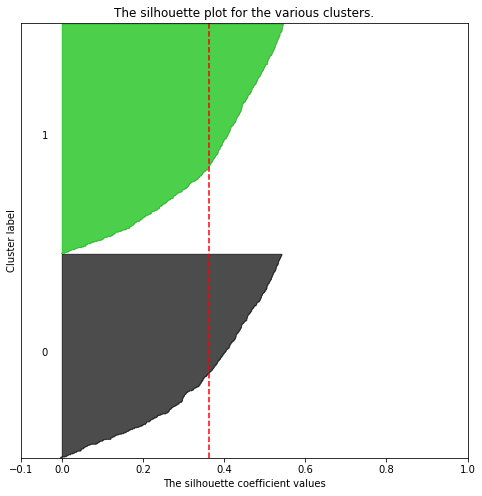

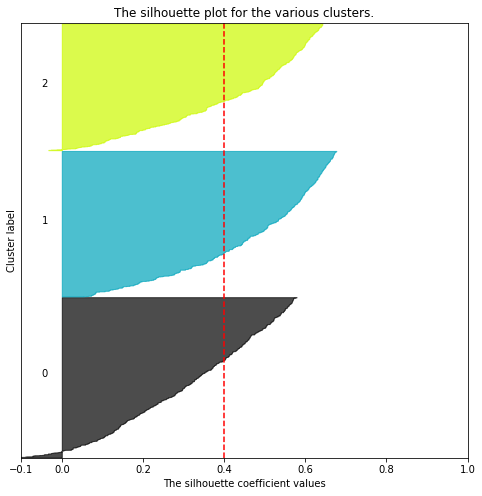

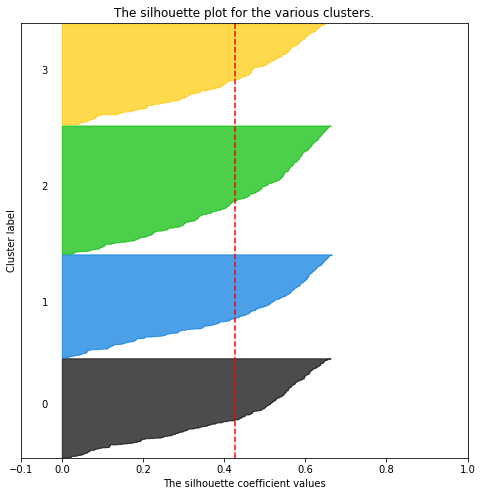

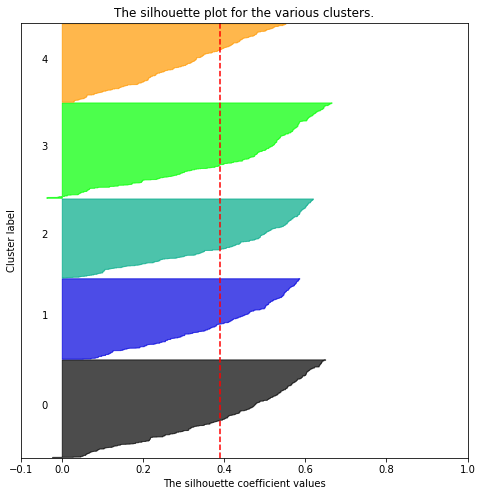

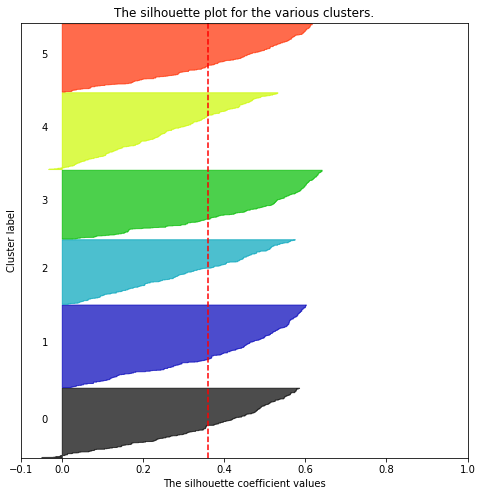

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

X = df_normalized[namaFitur].to_numpy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Untuk cluster sebanyak",
        n_clusters,
        "rata-rata silhouette coefficientnya adalah :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

> Menentukan nilai k yang optimal dengan metrik silhouette coefficient

In [ ]:
# Ambil K dengan silhouette coefficient tertinggi
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

print("Centroid cluster:")
for i in clusterer.cluster_centers_:
    print(i)

Centroid cluster:
[0.82525982 0.95253392]
[-0.94179977 -0.84577471]
[ 0.82958667 -0.7833339 ]
[-0.89715006  0.92395637]


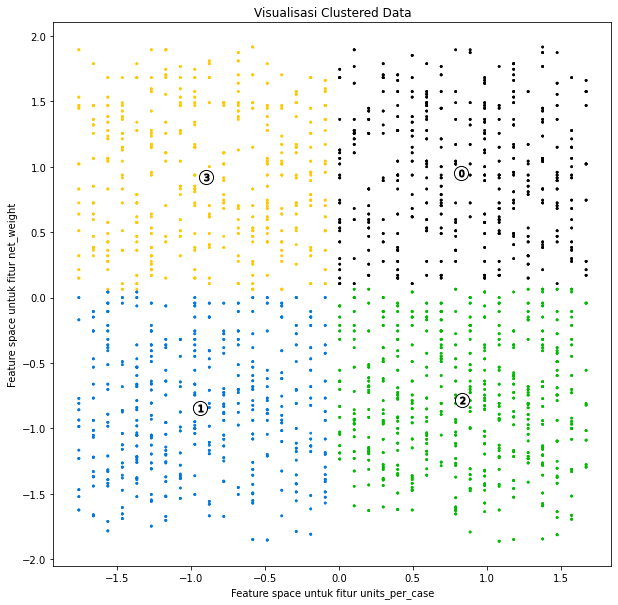

In [ ]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

n_clusters = 4

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax1.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax1.set_title("Visualisasi Clustered Data")
ax1.set_xlabel(f"Feature space untuk fitur {namaFitur[0]}")
ax1.set_ylabel(f"Feature space untuk fitur {namaFitur[1]}")

plt.show()

#### **Analisis**
- Cluster 0: stock dengan nilai `unit_per_case` tinggi, dan `net_weight` tinggi. Contoh stock pada cluster ini adalah
- Cluster 1: stock dengan nilai `unit_per_case` rendah, dan `net_weight` tinggi. Contoh stock pada cluster ini adalah
- Cluster 2: stock dengan nilai `unit_per_case` rendah, dan `net_weight` rendah. Contoh stock pada cluster ini adalah
- Cluster 3: stock dengan nilai `unit_per_case` tinggi, dan `net_weight` rendah. Contoh stock pada cluster ini adalah

### Promosi

In [ ]:
df_clustering =data_promo.copy()
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 63205
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   promo_id        331 non-null    int64  
 1   promotion_name  331 non-null    object 
 2   sales_country   331 non-null    object 
 3   media_type      331 non-null    object 
 4   cost            331 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.5+ KB


>Buang fitur yang kurang relevan

In [ ]:
df_clustering = df_clustering.drop(columns=['promo_id','promotion_name','sales_country','media_type'])

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

# Menggunakan np.array karena tidak semua kolom di df2 numerik
scaler = StandardScaler().fit(df_clustering)
scaled_data = scaler.transform(df_clustering)
normalized_data = normalize(scaled_data)
df_normalized = pd.DataFrame(scaled_data, columns = list(df_clustering.columns))

print(df_normalized)

         cost
0    0.865185
1    0.743480
2   -1.066881
3   -1.391766
4   -0.570257
..        ...
326  1.020020
327 -1.685886
328 -1.420164
329 -0.763295
330 -1.077699

[331 rows x 1 columns]


In [ ]:
from sklearn.decomposition import PCA
nilai_n = 1
pca = PCA(n_components = nilai_n)
pca.fit(df_clustering)
df3_pca = pca.transform(df_clustering)

print(pca.explained_variance_ratio_)

persentase = 0
for i in pca.explained_variance_ratio_:
    persentase += i
print("Tercakup " + str(persentase*100) + "% explained variance")

[1.]
Tercakup 100.0% explained variance


In [ ]:
fitur = []
for i in range(nilai_n):
    fitur.append(np.abs(pca.components_[i]).argmax())

# ambil nama fitur
namaFitur = []
for i in range(nilai_n):
    namaFitur.append(df_clustering.columns[fitur[i]])

namaFitur

['cost']

#### **Clustering : K-means Clustering**

Untuk cluster sebanyak 2 rata-rata silhouette coefficientnya adalah : 0.6317481423870059
Untuk cluster sebanyak 3 rata-rata silhouette coefficientnya adalah : 0.6063079146075814
Untuk cluster sebanyak 4 rata-rata silhouette coefficientnya adalah : 0.5886756929180991
Untuk cluster sebanyak 5 rata-rata silhouette coefficientnya adalah : 0.57365969966941
Untuk cluster sebanyak 6 rata-rata silhouette coefficientnya adalah : 0.5768960962289447


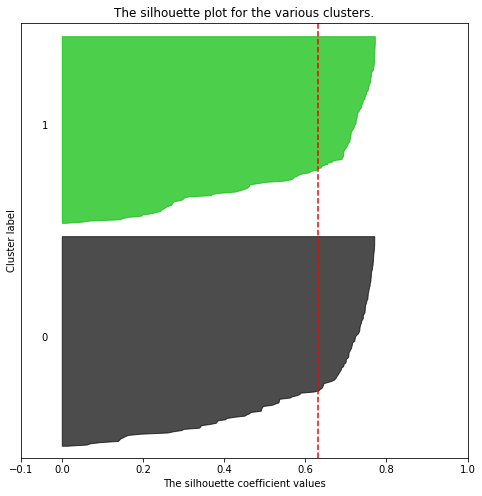

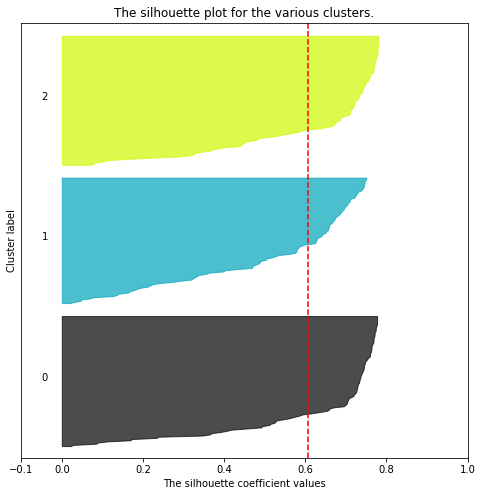

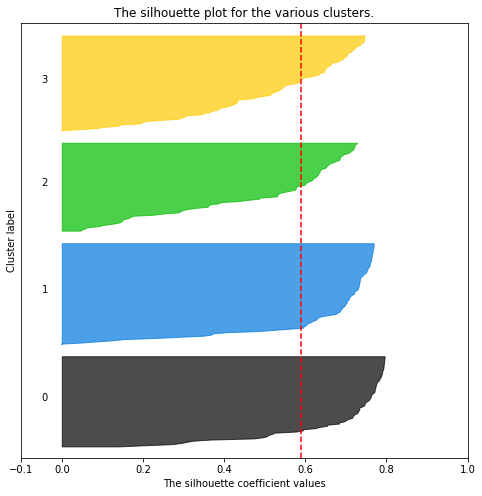

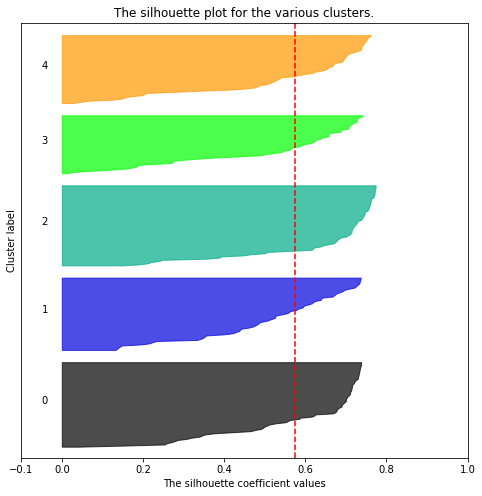

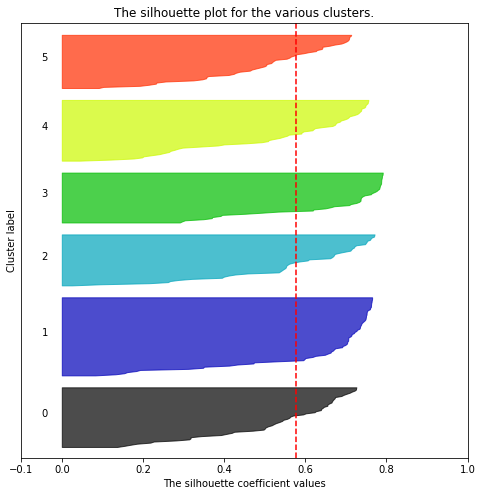

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

X = df_normalized[namaFitur].to_numpy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Untuk cluster sebanyak",
        n_clusters,
        "rata-rata silhouette coefficientnya adalah :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
# Ambil K dengan silhouette coefficient tertinggi
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)

print("Centroid cluster:")
for i in clusterer.cluster_centers_:
    print(i)

Centroid cluster:
[0.8270857]
[-0.91664275]


### Pembeli

In [ ]:
data_buyer_clustering =data_buyer.copy()
data_buyer_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 0 to 63607
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buyer_id                  3845 non-null   int64  
 1   marital_status            3845 non-null   int64  
 2   gender                    3845 non-null   object 
 3   total_children            3845 non-null   float64
 4   education                 3845 non-null   float64
 5   member_card               3845 non-null   int64  
 6   occupation                3845 non-null   object 
 7   houseowner                3845 non-null   int64  
 8   avg_cars_at home(approx)  3845 non-null   float64
 9   avg. yearly_income        3845 non-null   int64  
 10  sales_country             3845 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 360.5+ KB


In [ ]:
df_clustering = data_buyer_clustering.drop(columns=['buyer_id','marital_status','gender','occupation','sales_country'])

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

# Menggunakan np.array karena tidak semua kolom di df2 numerik
scaler = StandardScaler().fit(df_clustering)
scaled_data = scaler.transform(df_clustering)
normalized_data = normalize(scaled_data)
df_normalized = pd.DataFrame(scaled_data, columns = list(df_clustering.columns))

print(df_normalized)

      total_children  education  member_card  houseowner  \
0          -1.016260  -1.230497    -1.356795    0.806798   
1           0.960229  -0.456277     2.031521   -1.239467   
2          -0.357430  -0.456277    -0.227356    0.806798   
3          -1.675089  -1.230497    -1.356795    0.806798   
4           0.960229  -0.456277     2.031521    0.806798   
...              ...        ...          ...         ...   
3840        1.619059   1.092164    -0.227356   -1.239467   
3841        0.301400   1.866385    -0.227356    0.806798   
3842        0.301400   1.092164    -0.227356   -1.239467   
3843       -1.016260   1.866385    -0.227356    0.806798   
3844        0.301400   0.317944     0.902082   -1.239467   

      avg_cars_at home(approx)  avg. yearly_income  
0                    -1.207839           -1.168496  
1                    -0.291112           -0.631393  
2                    -1.207839           -0.631393  
3                    -2.124566           -1.168496  
4             

>Gunakan PCA untuk mencari 2 fitur terbaik

In [ ]:
from sklearn.decomposition import PCA
nilai_n = 2
pca = PCA(n_components = nilai_n)
pca.fit(df_clustering)
df3_pca = pca.transform(df_clustering)

print(pca.explained_variance_ratio_)

persentase = 0
for i in pca.explained_variance_ratio_:
    persentase += i
print("Tercakup " + str(persentase*100) + "% explained variance")

[9.99999996e-01 1.69848677e-09]
Tercakup 99.99999974585148% explained variance


In [ ]:
fitur = []
for i in range(nilai_n):
    fitur.append(np.abs(pca.components_[i]).argmax())

# ambil nama fitur
namaFitur = []
for i in range(nilai_n):
    namaFitur.append(df_clustering.columns[fitur[i]])

namaFitur

['avg. yearly_income', 'total_children']

#### **Clustering : K-means Clustering**

Untuk cluster sebanyak 2 rata-rata silhouette coefficientnya adalah : 0.3812097420918853
Untuk cluster sebanyak 3 rata-rata silhouette coefficientnya adalah : 0.4622068133144713
Untuk cluster sebanyak 4 rata-rata silhouette coefficientnya adalah : 0.44641953718573135
Untuk cluster sebanyak 5 rata-rata silhouette coefficientnya adalah : 0.41951316386769877
Untuk cluster sebanyak 6 rata-rata silhouette coefficientnya adalah : 0.44094216968811895


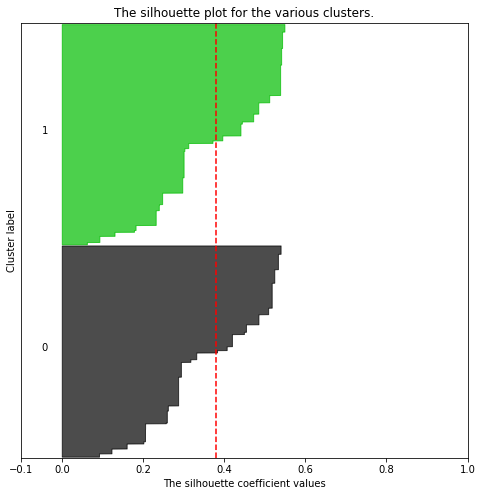

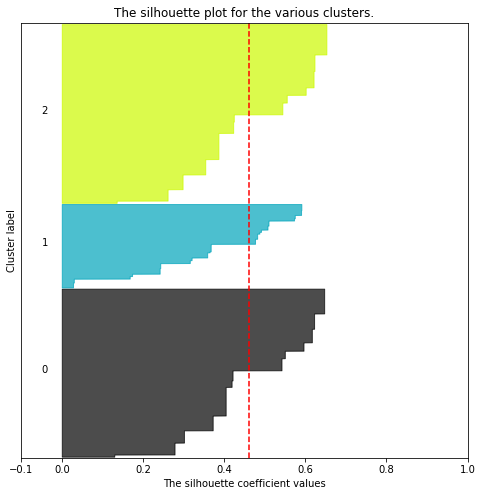

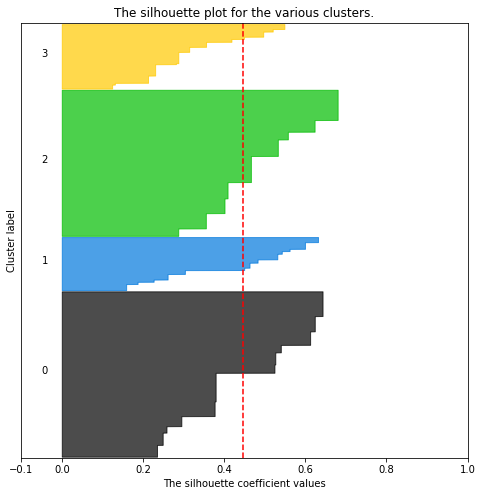

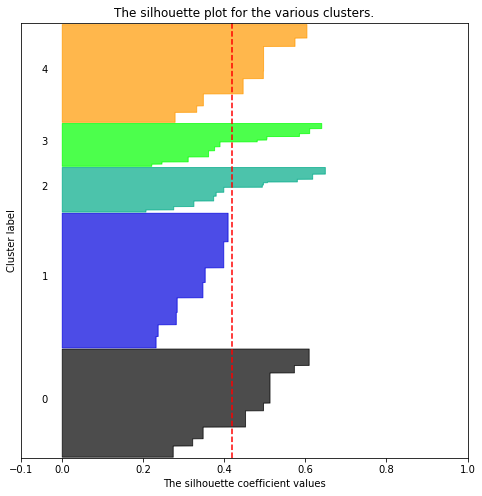

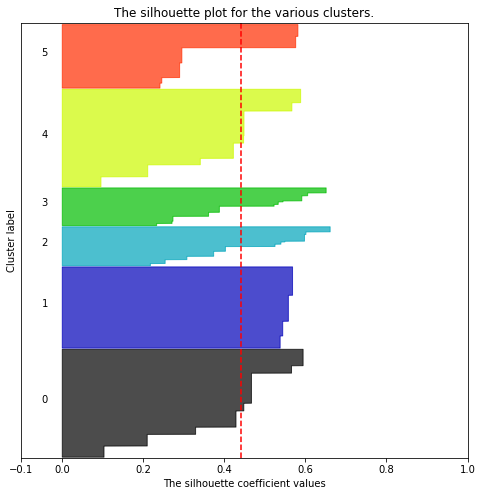

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

X = df_normalized[namaFitur].to_numpy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Untuk cluster sebanyak",
        n_clusters,
        "rata-rata silhouette coefficientnya adalah :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
# Ambil K dengan silhouette coefficient tertinggi
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X)

print("Centroid cluster:")
for i in clusterer.cluster_centers_:
    print(i)

Centroid cluster:
[-0.40718269 -0.90089855]
[ 1.71069271 -0.03331414]
[-0.41614801  0.86286911]


In [ ]:
from sklearn.decomposition import PCA
nilai_n = 2
pca = PCA(n_components = nilai_n)
pca.fit(df_clustering)
df3_pca = pca.transform(df_clustering)

print(pca.explained_variance_ratio_)

persentase = 0
for i in pca.explained_variance_ratio_:
    persentase += i
print("Tercakup " + str(persentase*100) + "% explained variance")

[9.99999996e-01 1.69848677e-09]
Tercakup 99.99999974585137% explained variance


In [ ]:
fitur = []
for i in range(nilai_n):
  fitur.append(np.abs(pca.components_[i]).argmax())

namaFitur = []
for i in range(nilai_n):
  namaFitur.append(df_clustering.columns[fitur[i]])

namaFitur

['avg. yearly_income', 'total_children']

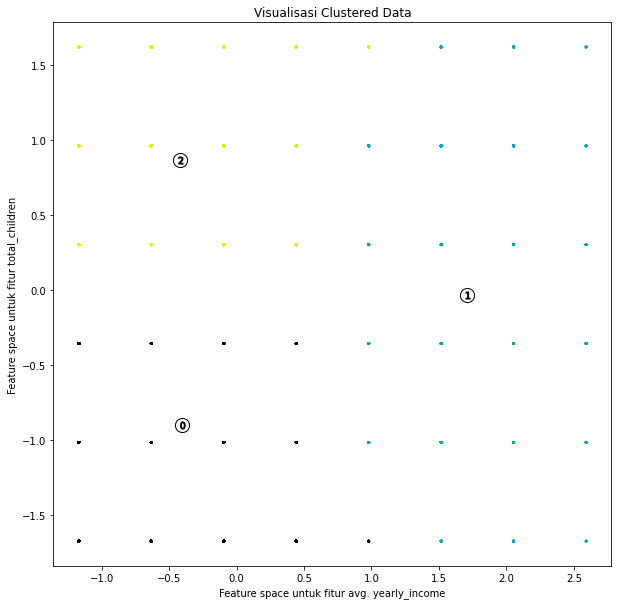

In [ ]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

n_clusters = 3

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax1.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax1.set_title("Visualisasi Clustered Data")
ax1.set_xlabel(f"Feature space untuk fitur {namaFitur[0]}")
ax1.set_ylabel(f"Feature space untuk fitur {namaFitur[1]}")

plt.show()

#### **Analisis**
- Cluster 0: stock dengan nilai `yearly_income` tinggi, dan `total_children` sedang.
- Cluster 1: stock dengan nilai `yearly_income` rendah, dan `total_children` rendah.
- Cluster 2: stock dengan nilai `yearly_income` rendah, dan `total_children` tinggi.

# Modeling Independent

## Predict Education dengan Tingkat Pendapatan Tahunan serta kepemilikan lainnya

> Pengenalan Data

In [ ]:
data_buyer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 0 to 63607
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buyer_id                  3845 non-null   int64  
 1   marital_status            3845 non-null   int64  
 2   gender                    3845 non-null   object 
 3   total_children            3845 non-null   float64
 4   education                 3845 non-null   float64
 5   member_card               3845 non-null   int64  
 6   occupation                3845 non-null   object 
 7   houseowner                3845 non-null   int64  
 8   avg_cars_at home(approx)  3845 non-null   float64
 9   avg. yearly_income        3845 non-null   int64  
 10  sales_country             3845 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 360.5+ KB


In [ ]:
data_buyer.head()

,buyer_id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,sales_country
0,1,1,F,1.0,1.0,0,Skilled Manual,1,1.0,20000,USA
78,904,1,F,4.0,2.0,3,Manual,0,2.0,40000,USA
103,912,0,M,2.0,2.0,1,Skilled Manual,1,1.0,40000,USA
127,14,0,F,0.0,1.0,0,Skilled Manual,1,0.0,20000,USA
144,411,1,M,4.0,2.0,3,Skilled Manual,1,4.0,40000,USA


Nilai `0` artinya education berjenis `Tidak berpendidikan/ data tidak diketahui`, nilai `1` artinya education berjenis `Partial High School`, nilai `2` artinya education berjenis `Partial College`, nilai `3` artinya ediucation berjenis `Bachelors Degree`, nilai `4` artinya education berjenis `Graduate Degree`


>Kita drop fitur-fitur yang tidak dipakai

In [ ]:
data_buyer_dropped_feature = data_buyer.drop(columns=['marital_status','gender','buyer_id','total_children', 'occupation', 'sales_country'])
data_buyer_dropped_feature


,education,member_card,houseowner,avg_cars_at home(approx),avg. yearly_income
0,1.0,0,1,1.0,20000
78,2.0,3,0,2.0,40000
103,2.0,1,1,1.0,40000
127,1.0,0,1,0.0,20000
144,2.0,3,1,4.0,40000
...,...,...,...,...,...
63583,4.0,1,0,1.0,60000
63590,5.0,1,1,3.0,80000
63593,4.0,1,0,4.0,60000
63600,5.0,1,1,2.0,120000


>Pisahkan target

In [ ]:
X_raw = data_buyer_dropped_feature.drop('education',axis=1)
y = data_buyer_dropped_feature['education']

> Cek korelasi fitur dengan target

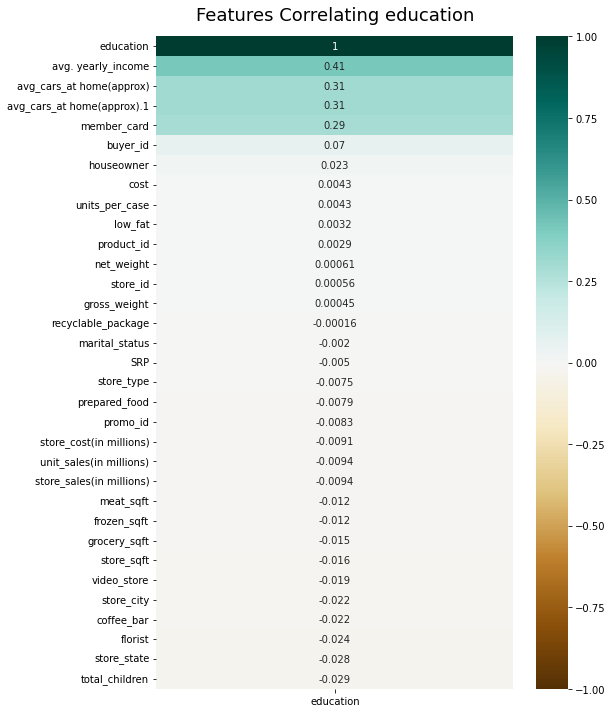

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[["education"]].sort_values(by='education', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating education', fontdict={'fontsize':18}, pad=16);
plt.show()

>Lakukan scaling dan pisahkan data training dan testing

RobustScaler dipilih karena robust terhadap outlier

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train, X_test, y_train, y_test = train_test_split(X_raw, y,test_size=0.2, stratify = y, random_state =123)
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

>Digunakan LazyRegressor untuk menentukan model terbaik untuk regre

In [ ]:
# from lazypredict.Supervised import LazyClassifier, LazyRegressor
# clf = LazyClassifier(verbose=0, custom_metric=None, predictions=True)
# models, predictions = clf.fit(X_train_scale, X_test_scale, y_train, y_test)
# models

### Model Regresi Satu: Random Forest

> Definisi

Random Forest Regressor menggunakan banyak decision tree yang masing-masing menggunakan fitur dan data training yang diacak. Tujuannya adalah meningkatkan keberagaman pada forest agar prediksi lebih robust.

In [ ]:
from sklearn.model_selection import KFold
rf = RandomForestClassifier()
cv = KFold(random_state=123, shuffle=True)
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [5, 10, 20, 25, 40, 50],
               'max_depth' : [3, 5, 10, 20, 50]}

rf = RandomForestClassifier()

clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv)

clf.fit(X_train_scale, y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}

In [ ]:
rf2 = RandomForestClassifier(**clf.best_params_)
rf2.fit(X_train_scale, y_train)
y_predict = rf2.predict(X_test_scale)
evaluate_classifier_performance(y_predict,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         1.0       0.85      0.55      0.67       196
         2.0       0.48      0.76      0.59       227
         3.0       0.00      0.00      0.00        89
         4.0       0.58      0.78      0.67       209
         5.0       0.00      0.00      0.00        48

    accuracy                           0.58       769
   macro avg       0.38      0.42      0.38       769
weighted avg       0.52      0.58      0.52       769



Confusion Matrix



prediction,1.0,2.0,4.0
actual,,,
1.0,108,67,21
2.0,7,173,47
3.0,0,66,23
4.0,11,35,163
5.0,1,20,27




Informasi lebih lengkap: 
F1 Macro Average: 0.38449442935068767
F1 Micro Average: 0.577373211963589
Precision Macro Average: 0.38193785037918554
Precision Micro Average: 0.577373211963589
Recall Macro Average: 0.41860785036565895
Recall Micro Average: 0.577373211963589



### Model Klasifikasi Dua: LGBM

> Definisi

LGBM atau Light BGM Classifier adalah gradient boosting framework yang menggunakan algoritma learning yang berbasis tree. LGBM menumbuhkan tree secara vertikal, berbeda dengan algoritma learning berbasis tree lainnya. Artinya, tree pada LGBM tumbuh melalui leaf, bukan level. Leaf dengan delta loss maksimal akan dipilih untuk tumbuh. Saat menumbuhkan leaf yang sama, algoritma leaf-wise dapat mengurangi loss lebih banyak dibandingkan algoritma level-wise.

In [ ]:
from lightgbm import LGBMClassifier

rf = LGBMClassifier()
cv = KFold(random_state=123, shuffle=True)
param_grid = {'boosting_type': ['gbdt', 'rf'],
              'num_leaves': [-1, 1, 5, 10]
               }

rf = LGBMClassifier()

clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv)

clf.fit(X_train_scale, y_train)
clf.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py", line 1552, in __init__
    train_set.construct().handle,
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py", line 997, in construct
    self._lazy_init(self.data, label=self.label,
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py", line 791, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py", line 847, in __init_from_np2d
    _safe_call(_LIB.LGBM_DatasetCreateFromMat(
  File "/usr/local/lib/python3.8/dist-packages/light

{'boosting_type': 'gbdt', 'num_leaves': 5}

> Testing

In [ ]:
rf2 = LGBMClassifier(**clf.best_params_)
rf2.fit(X_train_scale, y_train)
y_predict = rf2.predict(X_test_scale)
evaluate_classifier_performance(y_predict,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         1.0       0.74      0.55      0.63       196
         2.0       0.48      0.79      0.60       227
         3.0       0.00      0.00      0.00        89
         4.0       0.62      0.76      0.68       209
         5.0       0.00      0.00      0.00        48

    accuracy                           0.58       769
   macro avg       0.37      0.42      0.38       769
weighted avg       0.50      0.58      0.52       769



Confusion Matrix



prediction,1.0,2.0,4.0
actual,,,
1.0,108,71,17
2.0,14,179,34
3.0,1,68,20
4.0,15,36,158
5.0,7,17,24




Informasi lebih lengkap: 
F1 Macro Average: 0.3832151952769064
F1 Micro Average: 0.5786736020806242
Precision Macro Average: 0.37036265988544564
Precision Micro Average: 0.5786736020806242
Recall Macro Average: 0.41910950498277855
Recall Micro Average: 0.5786736020806242



## Predict Store Sales without Store Cost

In [ ]:
X_sales = data.drop(['store_cost(in millions)', 'store_sales(in millions)',
                     'store_id', 'promo_id', 'promotion_name', 'media_type',
                     'cost', 'buyer_id', 'marital_status', 'gender', 'total_children',
                     'education', 'member_card', 'occupation', 'houseowner',
                     'avg_cars_at home(approx)', 'avg. yearly_income', 'recyclable_package',
                     'product_id'],
                    axis=1).select_dtypes(exclude=['object'])
y_sales = data['store_sales(in millions)']

In [ ]:
X_sales_train, X_sales_test, y_sales_train, y_test = train_test_split(X_sales, y_sales, test_size=0.25, random_state=1019)

In [ ]:
X_sales

,unit_sales(in millions),avg_cars_at home(approx).1,SRP,gross_weight,net_weight,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,prepared_food,florist
0,4.0,1.0,1.84,19.70,17.70,0.0,17.0,4,0,0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0
1,3.0,1.0,2.97,13.50,11.50,1.0,15.0,4,0,0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0
3,3.0,1.0,3.95,7.24,5.23,0.0,31.0,4,0,0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0
4,3.0,1.0,0.66,11.20,9.19,0.0,9.0,4,0,0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0
5,3.0,1.0,3.58,14.40,12.30,0.0,5.0,4,0,0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63603,1.0,2.0,1.40,17.90,15.80,1.0,32.0,1,5,2,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0
63604,1.0,2.0,1.65,15.30,14.30,1.0,16.0,1,5,2,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0
63605,1.0,2.0,2.35,21.20,19.20,1.0,6.0,1,5,2,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0
63606,2.0,2.0,2.17,6.96,3.96,1.0,15.0,1,5,2,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0


### Predict with Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Melakukan training pada model random forest
rf_reg_sales = RandomForestRegressor(random_state=1019)
rf_reg_sales.fit(X_sales_train, y_sales_train)

# Memprediksi data testing
y_pred_sales = rf_reg_sales.predict(X_sales_test)

In [ ]:
y_pred_sales

array([5.73, 4.08, 8.16, ..., 8.73, 4.36, 3.99])

In [ ]:
metrics(y_pred_sales)

MAE: 0.0008302839743241457
MSE: 0.0013135314311246598
RMSE: 0.036242674171819325
R_squared: 0.9998893185252437


### Predict with Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_sales_train, y_sales_train)

# Memprediksi data testing
y_pred_lr = lin_reg.predict(X_sales_test)

In [ ]:
y_pred_lr

array([5.68905086, 4.01727104, 8.20094228, ..., 8.79534231, 4.4344279 ,
       3.90962178])

In [ ]:
metrics(y_pred_lr)

MAE: 0.4970100506198543
MSE: 0.5907119663050551
RMSE: 0.768577885646637
R_squared: 0.950225118305015


## New Section

In [ ]:
# Model Recycle??

# Test Prediction
Predict against Data: df_unknown

In [ ]:
df_unknown

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
3268,Starchy Foods,Starchy Foods,NaN,NaN,NaN,2.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6712,1,4384
3269,Starchy Foods,Starchy Foods,NaN,NaN,NaN,5.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6723,1,4394
3270,Starchy Foods,Starchy Foods,NaN,NaN,NaN,4.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6715,1,4408
3271,Starchy Foods,Starchy Foods,NaN,NaN,NaN,4.0,Bag Stuffers,USA,0,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6726,1,4398
3272,Starchy Foods,Starchy Foods,NaN,NaN,NaN,3.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6722,1,4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63504,Dairy,Dairy,NaN,NaN,NaN,1.0,Super Duper Savers,USA,0,F,...,1.0,0.0,0.0,0.0,Sunday Paper,124.30,50574,6582,302,3894
63539,Dairy,Dairy,NaN,NaN,NaN,2.0,Best Savings,Mexico,1,M,...,1.0,0.0,0.0,0.0,Cash Register Handout,146.32,50583,6561,305,4307
63549,Dairy,Dairy,NaN,NaN,NaN,3.0,Super Wallet Savers,Mexico,0,F,...,1.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",69.15,50583,6565,307,4310
63576,Dairy,Dairy,NaN,NaN,NaN,2.0,Three for One,USA,1,F,...,1.0,0.0,0.0,0.0,Cash Register Handout,136.43,50585,6630,321,4354


In [ ]:
df_predicted = df_unknown

## Predict Sales Volume

In [ ]:
X_sales_pred = df_predicted.drop(['store_cost(in millions)', 'store_sales(in millions)',
                     'store_id', 'promo_id', 'promotion_name', 'media_type',
                     'cost', 'buyer_id', 'marital_status', 'gender', 'total_children',
                     'education', 'member_card', 'occupation', 'houseowner',
                     'avg_cars_at home(approx)', 'avg. yearly_income', 'recyclable_package',
                     'product_id'],
                    axis=1).select_dtypes(exclude=['object'])

In [ ]:
rf_reg_sales

RandomForestRegressor(random_state=1019)

In [ ]:
y_sales_pred = rf_reg_sales.predict(X_sales_pred)

In [ ]:
df_predicted.loc[df_predicted['store_sales(in millions)'].isna(), 'store_sales(in millions)'] = y_sales_pred

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df_predicted

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
3268,Starchy Foods,Starchy Foods,NaN,5.4600,NaN,2.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6712,1,4384
3269,Starchy Foods,Starchy Foods,NaN,14.0525,NaN,5.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6723,1,4394
3270,Starchy Foods,Starchy Foods,NaN,5.8400,NaN,4.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6715,1,4408
3271,Starchy Foods,Starchy Foods,NaN,11.1200,NaN,4.0,Bag Stuffers,USA,0,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6726,1,4398
3272,Starchy Foods,Starchy Foods,NaN,2.1000,NaN,3.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6722,1,4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63504,Dairy,Dairy,NaN,1.7983,NaN,1.0,Super Duper Savers,USA,0,F,...,1.0,0.0,0.0,0.0,Sunday Paper,124.30,50574,6582,302,3894
63539,Dairy,Dairy,NaN,4.3400,NaN,2.0,Best Savings,Mexico,1,M,...,1.0,0.0,0.0,0.0,Cash Register Handout,146.32,50583,6561,305,4307
63549,Dairy,Dairy,NaN,4.3500,NaN,3.0,Super Wallet Savers,Mexico,0,F,...,1.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",69.15,50583,6565,307,4310
63576,Dairy,Dairy,NaN,7.0000,NaN,2.0,Three for One,USA,1,F,...,1.0,0.0,0.0,0.0,Cash Register Handout,136.43,50585,6630,321,4354


## Predict Store Cost

In [ ]:
X_cost_pred = df_predicted[['store_id', 'store_type', 'store_city', 'store_state', 'store_sqft',
               'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
               'video_store', 'prepared_food', 'florist',
               'store_sales(in millions)']]

In [ ]:
rf_reg

RandomForestRegressor(random_state=1019)

In [ ]:
y_cost_pred = rf_reg.predict(X_cost_pred)

In [ ]:
y_cost_pred.size

1200

In [ ]:
df_predicted.loc[df_predicted['store_cost(in millions)'].isna(), 'store_cost(in millions)'] = y_cost_pred

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Predict Education Level

In [ ]:
X_edu_pred = df_predicted[['buyer_id', 'marital_status', 'gender', 'total_children',
               'member_card', 'occupation', 'houseowner',
               'avg_cars_at home(approx)', 'avg. yearly_income',
               'sales_country']]
X_edu_pred = X_edu_pred.drop(columns=['marital_status','gender','buyer_id','total_children', 'occupation', 'sales_country'])

In [ ]:
clf

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'rf'],
                         'num_leaves': [-1, 1, 5, 10]})

In [ ]:
y_edu_pred = clf.predict(X_edu_pred)

In [ ]:
df_predicted.loc[df_predicted['education'].isna(), 'education'] = y_cost_pred

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Predictions

In [ ]:
bins = [0, 0.5, 1.5, 2.5, 3.5, 4.5, np.inf]
names = ['NA', 'Partial High School', 'High School Degree', 'Partial College', 'Bachelors Degree', 'Graduate Degree']

df_predicted['education'] = pd.cut(df_predicted['education'], bins, labels=names)

<ipython-input-243-3c6ee263817d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['education'] = pd.cut(df_predicted['education'], bins, labels=names)


In [ ]:
df_predicted

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,coffee_bar,video_store,prepared_food,florist,media_type,cost,store_id,product_id,promo_id,buyer_id
3268,Starchy Foods,Starchy Foods,NaN,5.4600,2.259683,2.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6712,1,4384
3269,Starchy Foods,Starchy Foods,NaN,14.0525,5.326042,5.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6723,1,4394
3270,Starchy Foods,Starchy Foods,NaN,5.8400,2.291688,4.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6715,1,4408
3271,Starchy Foods,Starchy Foods,NaN,11.1200,4.300235,4.0,Bag Stuffers,USA,0,F,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6726,1,4398
3272,Starchy Foods,Starchy Foods,NaN,2.1000,0.813148,3.0,Bag Stuffers,USA,0,M,...,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,50587,6722,1,4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63504,Dairy,Dairy,NaN,1.7983,0.702034,1.0,Super Duper Savers,USA,0,F,...,1.0,0.0,0.0,0.0,Sunday Paper,124.30,50574,6582,302,3894
63539,Dairy,Dairy,NaN,4.3400,1.829697,2.0,Best Savings,Mexico,1,M,...,1.0,0.0,0.0,0.0,Cash Register Handout,146.32,50583,6561,305,4307
63549,Dairy,Dairy,NaN,4.3500,1.828635,3.0,Super Wallet Savers,Mexico,0,F,...,1.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",69.15,50583,6565,307,4310
63576,Dairy,Dairy,NaN,7.0000,2.931504,2.0,Three for One,USA,1,F,...,1.0,0.0,0.0,0.0,Cash Register Handout,136.43,50585,6630,321,4354
